In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pickle

print('Numpy version:', np.__version__)
print('Pandas version:', pd.__version__)

Numpy version: 1.20.3
Pandas version: 1.3.4


In [3]:
import sklearn as sk
sk.__version__

'1.1.2'

In [4]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12

import dataset

In [52]:
data_train = pd.read_excel(r'E:/R code-LMX/Yimin-medical disputes/start0.9-number.xlsx')
data_test = pd.read_excel(r'E:/R code-LMX/Yimin-medical disputes/starv0.1-number.xlsx')
#data_test = pd.read_excel(r'E:/R code-LMX/Yimin-medical disputes/External validation/4-data.xlsx')

In [6]:
pd.set_option('display.max_columns', data_train.shape[1])
pd.set_option('max_colwidth', 1000)

In [7]:
data_train.head()

,Unnamed: 0,No,x1,x2,x4,x7,x8,x9,x10,x11,x12,x13,x14,x17,x18,x19,x20,x21,x22,x231,x233,x234,x241,x242,x243,x257,x26,x27,x28,x31,x33,x36,Y
0,1,2,1,2,2,3,3,2,2,1,2,2,1,2,2,2,2,1,1,0,0,0,1,1,0,1,1,1,1,2,2,2,0
1,2,3,1,2,1,1,4,2,2,1,3,3,3,2,3,3,3,2,2,0,0,0,0,0,0,1,2,2,2,3,1,4,0
2,3,4,1,2,3,3,4,2,2,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,2,0
3,4,5,1,2,3,4,5,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0
4,5,6,1,1,3,1,3,2,2,1,2,2,3,2,2,3,2,1,1,1,1,0,1,1,1,1,2,2,2,2,2,3,0


In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34286 entries, 0 to 34285
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  34286 non-null  int64
 1   No          34286 non-null  int64
 2   x1          34286 non-null  int64
 3   x2          34286 non-null  int64
 4   x4          34286 non-null  int64
 5   x7          34286 non-null  int64
 6   x8          34286 non-null  int64
 7   x9          34286 non-null  int64
 8   x10         34286 non-null  int64
 9   x11         34286 non-null  int64
 10  x12         34286 non-null  int64
 11  x13         34286 non-null  int64
 12  x14         34286 non-null  int64
 13  x17         34286 non-null  int64
 14  x18         34286 non-null  int64
 15  x19         34286 non-null  int64
 16  x20         34286 non-null  int64
 17  x21         34286 non-null  int64
 18  x22         34286 non-null  int64
 19  x231        34286 non-null  int64
 20  x233        34286 non-null  

Data preprocessing piprlines
Prepare the data to a format that can be fit into scikit learn algorithms

Categorical variable encoder

In [9]:
categorical_vars = [
"x1",
"x2",
"x4",
"x7",
"x8",
"x9",
"x10",
"x17",
"x19",
"x20",
"x234",
"x242",
"x257",
"x26",
"x27",
"x33"]

In [10]:
data_train[categorical_vars].head()

,x1,x2,x4,x7,x8,x9,x10,x17,x19,x20,x234,x242,x257,x26,x27,x33
0,1,2,2,3,3,2,2,2,2,2,0,1,1,1,1,2
1,1,2,1,1,4,2,2,2,3,3,0,0,1,2,2,1
2,1,2,3,3,4,2,2,1,1,1,0,1,1,1,1,1
3,1,2,3,4,5,2,1,1,1,1,0,1,1,1,1,1
4,1,1,3,1,3,2,2,2,3,2,0,1,1,2,2,2


In [11]:
# to make a custom transformer to fit into a pipeline
class Vars_selector(BaseEstimator, TransformerMixin):
    '''Returns a subset of variables in a dataframe'''
    def __init__(self, var_names):
        '''var_names is a list of categorical variables names'''
        self.var_names = var_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        '''returns a dataframe with selected variables'''
        return X[self.var_names]

In [12]:
class Cat_vars_encoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        '''X is a dataframe'''

        return X.values

Transform data in a pipeline

In [13]:
# categorical variables preprocessing
cat_vars_pipeline = Pipeline([
    ('selector', Vars_selector(categorical_vars)),
    ('encoder', Cat_vars_encoder())
])

For many machine learning algorithms, gradient descent is the preferred or even the only optimization method to learn the model parameters. Gradient descent is highly sensitive to feature scaling.

** Continuous vars **

In [14]:
continuous_vars = ["x22", "x36"]

In [15]:
data_train[continuous_vars].describe()

,x22,x36
count,34286.000000,34286.000000
mean,1.187628,1.768798
std,0.458453,0.724058
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,1.000000,2.000000
max,5.000000,5.000000


The scales among the continuous variables vary a lot, we need to standardize them prior to modelling.

In [16]:
# continuous variables preprocessing
cont_vars_pipeline = Pipeline([
    ('selector', Vars_selector(continuous_vars)),
    ('standardizer', StandardScaler())
])

To transform the two types of variables in one step

In [17]:
preproc_pipeline = FeatureUnion(transformer_list=[
    ('cat_pipeline', cat_vars_pipeline),
    ('cont_pipeline', cont_vars_pipeline)
])

In [18]:
data_train_X = pd.DataFrame(preproc_pipeline.fit_transform(data_train), 
                            columns=categorical_vars + continuous_vars)

In [19]:
data_train_X.head()

,x1,x2,x4,x7,x8,x9,x10,x17,x19,x20,x234,x242,x257,x26,x27,x33,x22,x36
0,1.0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,-0.409268,0.319319
1,1.0,2.0,1.0,1.0,4.0,2.0,2.0,2.0,3.0,3.0,0.0,0.0,1.0,2.0,2.0,1.0,1.772012,3.081569
2,1.0,2.0,3.0,3.0,4.0,2.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.409268,0.319319
3,1.0,2.0,3.0,4.0,5.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.409268,-1.061806
4,1.0,1.0,3.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,0.0,1.0,1.0,2.0,2.0,2.0,-0.409268,1.700444


Fitting classifiers

In [20]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import learning_curve, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

In [21]:
data_train['Y'].value_counts()

0    18487
1    15799
Name: Y, dtype: int64

This is a fairly balanced dataset(i.e., the number of positive and negative cases are roughly the same), and we'll use AUC as our metric to optimise the model performance.

Assessing learning curve using the model default settings
Tuning the model hyper-parameters are always difficult, so a good starting point is to see how the Scikit-learn default settings for the model performs, i.e., to see if it overfits or underfits, or is just right. This will give a good indication as to the direction of tuning.

In [22]:
def plot_learning_curves(model, X, y):
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=5, scoring='roc_auc',
                                                           random_state=42, n_jobs=-1)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), "o-", label="training scores")
    plt.plot(train_sizes, np.mean(val_scores, axis=1), "o-", label="x-val scores")
    plt.legend(fontsize=14).get_frame().set_facecolor('white')
    plt.xlabel("Training set size")
    plt.ylabel("Area under Curve")
    plt.title('{} learning curve'.format(model.__class__.__name__))

# Compute and compare test metrics
Transform test data set

In [41]:
data_test_X = pd.DataFrame(preproc_pipeline.transform(data_test), # it's imperative not to do fit_transfomr again
                           columns=categorical_vars + continuous_vars)

In [42]:
data_test_X.shape

(3767, 18)

In [43]:
data_test_X.head()

,x1,x2,x4,x7,x8,x9,x10,x17,x19,x20,x234,x242,x257,x26,x27,x33,x22,x36
0,1.0,2.0,3.0,3.0,4.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,2.0,-0.409268,-1.061806
1,1.0,2.0,1.0,2.0,3.0,1.0,4.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,2.0,-0.409268,0.319319
2,1.0,2.0,1.0,4.0,4.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.409268,1.700444
3,1.0,1.0,1.0,1.0,4.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,-0.409268,4.462693
4,1.0,2.0,3.0,2.0,5.0,2.0,1.0,2.0,2.0,2.0,0.0,1.0,1.0,2.0,2.0,1.0,1.772012,0.319319


In [44]:
def plot_roc_curve(fpr, tpr, auc, model=None):
    if model == None:
        title = None
    elif isinstance(model, str):
        title = model
    else:
        title = model.__class__.__name__
#    title = None if model == None else model.__class__.__name__
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, linewidth=2, label='auc: {}'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-.01, 1.01, -.01, 1.01])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(fontsize=14).get_frame().set_facecolor('white')
    plt.title('{} - ROC Curve'.format(title))

# Logistic Regression---网格搜索模型调参GridSearchCV

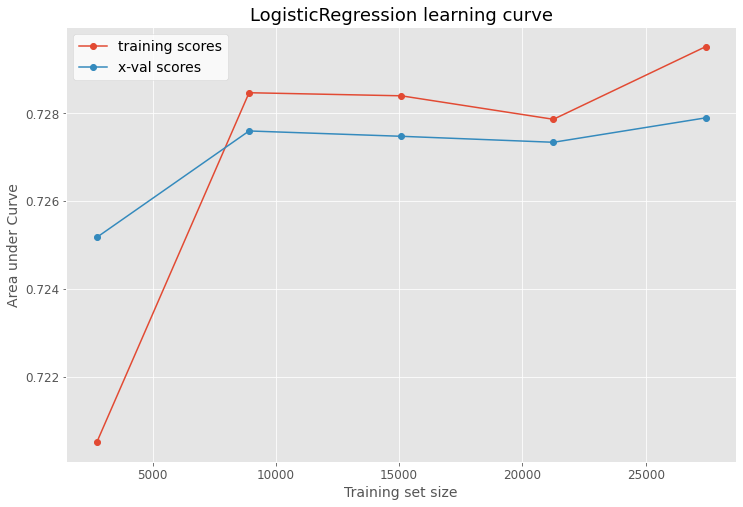

In [27]:
lr_clf = LogisticRegression(n_jobs = -1)
plot_learning_curves(lr_clf, data_train_X, data_train['Y'])

Let's see if we can squeeze some more performance out by optimising C

In [31]:
param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    }
lr_clf = LogisticRegression(random_state=42)
grid_search = GridSearchCV(lr_clf, param_grid=param_grid, return_train_score=True,
                                cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(data_train_X, data_train['Threemonthmortality'])

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc')

In [32]:
cv_rlt = grid_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.842104,0.842662,{'C': 0.01}
1,0.841997,0.842556,{'C': 0.1}
2,0.841986,0.842544,{'C': 1}
3,0.841984,0.842543,{'C': 10}
4,0.841983,0.842543,{'C': 1000}
5,0.841982,0.842543,{'C': 100}
6,0.841830,0.842373,{'C': 0.001}


# Looks like C=100? is our best value.

下方with open,"wb",确实是保存了新的pkl模型文件，下一次使用该文件只需要直接调用即可

In [105]:
lr_clf = grid_search.best_estimator_
with open('E:/R code-LMX/R code for SEER-Bone metastasis-LYS/Models/lr_clf_final_round.pkl', 'wb') as f:
    pickle.dump(lr_clf, f)

NameError: name 'grid_search' is not defined

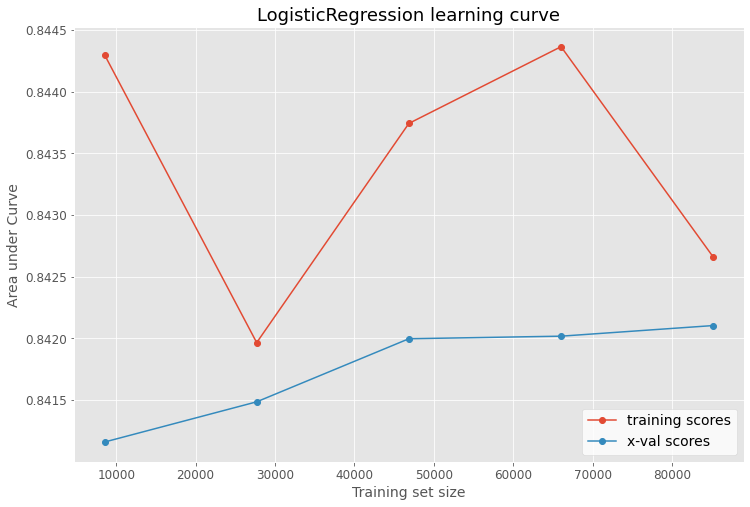

In [34]:
plot_learning_curves(lr_clf, data_train_X, data_train['Threemonthmortality'])

Looks like the logistic regression model would benefit from additional data.

# Logistic Regression model-ROC

In [107]:
# Import model and retrain
with open('E:/R code-LMX/Yimin-medical disputes/Models/lr_clf_final_round.pkl', 'rb') as f:
    lr_clf = pickle.load(f)
lr_clf.fit(data_train_X, data_train['Y'])

LogisticRegression(C=0.01, random_state=42)

Accuracy scores

In [108]:
accu_lr = accuracy_score(data_test['Y'], lr_clf.predict(data_test_X))

In [109]:
round(accu_lr,3)

0.715

In [110]:
pd.crosstab(data_test['Y'], lr_clf.predict(data_test_X))

col_0,0,1
Y,,
0,15343,1975
1,5505,3462


In [111]:
pred_proba_lr = lr_clf.predict_proba(data_test_X)

In [112]:
fpr, tpr, _ = roc_curve(data_test['Y'], pred_proba_lr[:, 1])
auc_lr = roc_auc_score(data_test['Y'], pred_proba_lr[:, 1])

In [113]:
round(auc_lr,3)

0.724

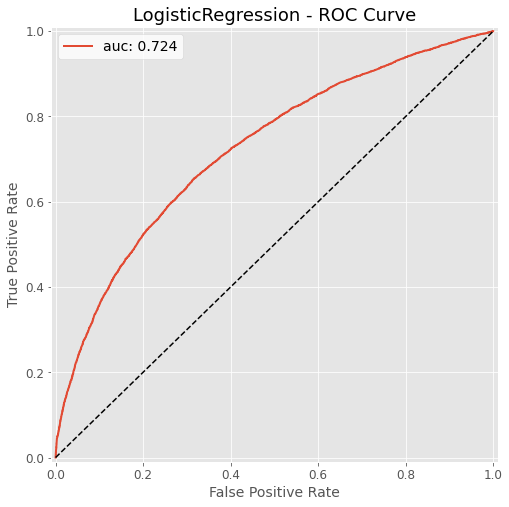

In [114]:
plot_roc_curve(fpr, tpr, round(auc_lr,3), lr_clf)

In [115]:
data_test['lr_pred_proba'] = pred_proba_lr[:, 1]

In [116]:
data_test.to_csv('E:/R code-LMX/Yimin-medical disputes/External validation/test_set_with_predictions-lr-external validation.csv'.format(len(data_train)), index=False)

# XGboot

In [45]:
from xgboost.sklearn import XGBClassifier

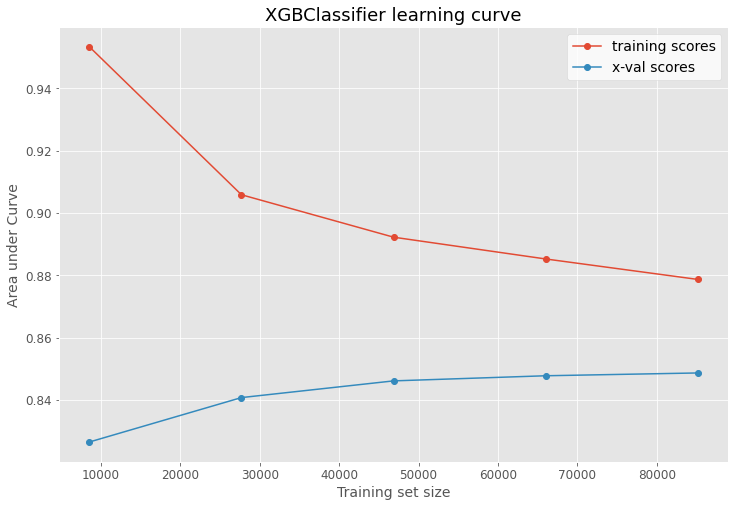

In [46]:
Xgbc_clf=XGBClassifier(random_state=42)  #Xgbc
plot_learning_curves(Xgbc_clf, data_train_X, data_train['Threemonthmortality'])

max_depth = 5 ：这应该在3-10之间。我从5开始，但你也可以选择不同的数字。4-6可以是很好的起点。
min_child_weight = 1 ：选择较小的值是因为它是高度不平衡的类问题，并且叶节点可以具有较小的大小组。
gamma = 0.1 ：也可以选择较小的值，如0.1-0.2来启动。无论如何，这将在以后进行调整。
subsample，colsample_bytree = 0.8：这是一个常用的使用起始值。典型值介于0.5-0.9之间。
scale_pos_weight = 1：由于高级别的不平衡。
colsample_bytree = 0.5,gamma=0.2

In [48]:
param_distribs = {
     'n_estimators': stats.randint(low=60, high=120),      
    'max_depth': stats.randint(low=1, high=10),
    'min_child_weight': stats.randint(low=1, high=10)
    }
Xgbc_clf=XGBClassifier(random_state=42,learning_rate=0.125,use_label_encoder=False)
Xgbc_search = RandomizedSearchCV(Xgbc_clf, param_distributions=param_distribs, return_train_score=True,
                                n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
Xgbc_gs=Xgbc_search.fit(data_train_X, data_train['Threemonthmortality'])

[23:31:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [49]:
print(Xgbc_gs.best_score_)

0.8531454792414715


In [50]:
print(Xgbc_gs.best_params_)

{'max_depth': 4, 'min_child_weight': 9, 'n_estimators': 119}


In [51]:
cv_rlt = Xgbc_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.853145,0.859249,"{'max_depth': 4, 'min_child_weight': 9, 'n_estimators': 119}"
1,0.853114,0.859298,"{'max_depth': 4, 'min_child_weight': 7, 'n_estimators': 118}"
2,0.853099,0.859127,"{'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 108}"
3,0.853035,0.858287,"{'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 89}"
4,0.852982,0.858258,"{'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 88}"
...,...,...,...
95,0.841871,0.842461,"{'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 78}"
96,0.841739,0.842355,"{'max_depth': 1, 'min_child_weight': 8, 'n_estimators': 76}"
97,0.840552,0.841120,"{'max_depth': 1, 'min_child_weight': 9, 'n_estimators': 66}"
98,0.839915,0.840587,"{'max_depth': 1, 'min_child_weight': 2, 'n_estimators': 61}"


In [57]:
rf_clf = Xgbc_search.best_estimator_
rf_clf.fit(data_train_X, data_train['Threemonthmortality'])
with open('E:/R code-LMX/R code for SEER-Bone metastasis-LYS/Models/Xgbc_clf_final_round.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

[23:35:11] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
rf_clf

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.125, max_delta_step=0,
              max_depth=4, min_child_weight=9, missing=nan,
              monotone_constraints='()', n_estimators=119, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

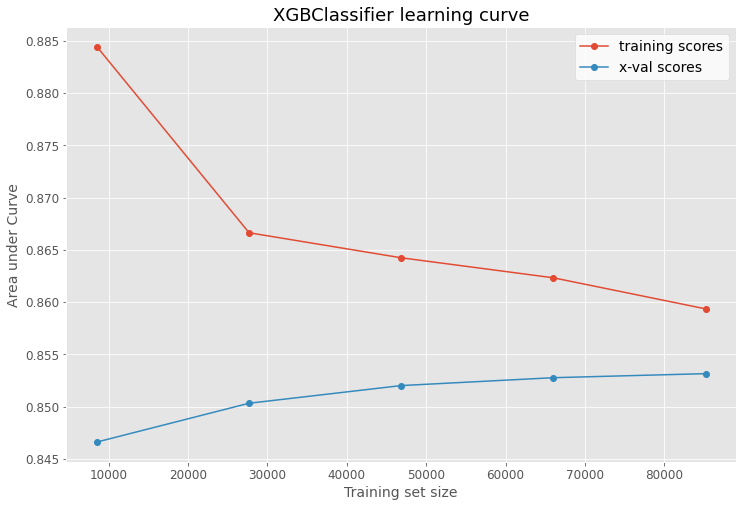

In [59]:
plot_learning_curves(rf_clf, data_train_X, data_train['Threemonthmortality'])

In [60]:
# Import model and retrain
with open('E:/R code-LMX/R code for SEER-Bone metastasis-LYS/Models/Xgbc_clf_final_round.pkl', 'rb') as f:
    Xgbc_clf = pickle.load(f)
Xgbc_clf.fit(data_train_X, data_train['Threemonthmortality'])

[23:36:06] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.125, max_delta_step=0,
              max_depth=4, min_child_weight=9, missing=nan,
              monotone_constraints='()', n_estimators=119, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [62]:
accu_Xgbc = accuracy_score(data_test['Threemonthmortality'], Xgbc_clf.predict(data_test_X))
round(accu_Xgbc,3)

0.808

In [63]:
pd.crosstab(data_test['Threemonthmortality'], Xgbc_clf.predict(data_test_X))

col_0,0,1
Threemonthmortality,,
0,6597,874
1,1378,2886


In [64]:
pred_proba_Xgbc = Xgbc_clf.predict_proba(data_test_X)

In [65]:
fpr, tpr, _ = roc_curve(data_test['Threemonthmortality'], pred_proba_Xgbc[:, 1])
auc_Xgbc = roc_auc_score(data_test['Threemonthmortality'], pred_proba_Xgbc[:, 1])
round(auc_Xgbc,3)

0.858

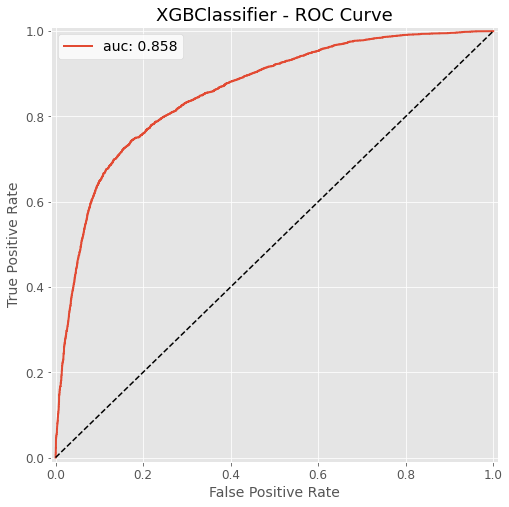

In [66]:
plot_roc_curve(fpr, tpr, round(auc_Xgbc,3), Xgbc_clf)

In [67]:
data_test['lr_pred_proba'] = pred_proba_Xgbc[:, 1]
data_test.to_csv('E:/R code-LMX/R code for SEER-Bone metastasis-LYS/Models/test_set_with_predictions-Xgbc.csv'.format(len(data_train)), index=False)

# DecisionTreeClassifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

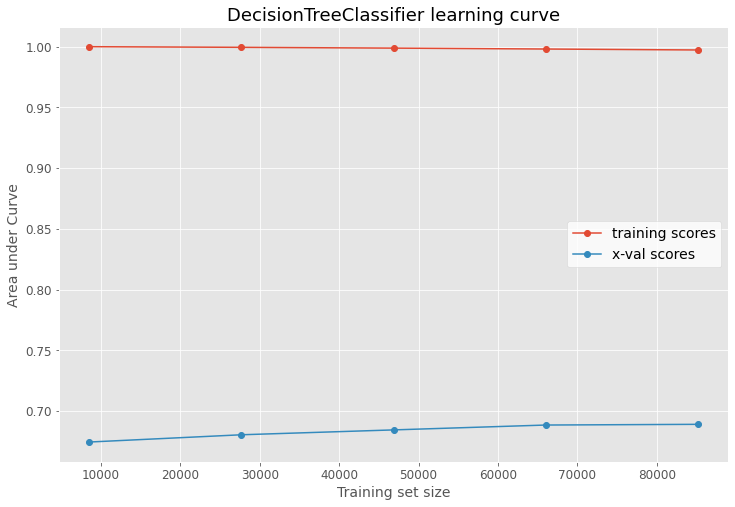

In [70]:
tr_clf=DecisionTreeClassifier(random_state=42)  # 决策树模型
plot_learning_curves(tr_clf, data_train_X, data_train['Threemonthmortality'])

In [79]:
param_distribs = {
         'max_features': ['auto', 'log2'],
        'max_depth': stats.randint(low=1, high=50),
        'min_samples_split': stats.randint(low=2, high=200), 
        'min_samples_leaf': stats.randint(low=2, high=200)
    }
dt_clf = DecisionTreeClassifier(random_state=42,criterion='gini', splitter='best')
rnd_search = RandomizedSearchCV(dt_clf, param_distributions=param_distribs, return_train_score=True,
                                n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
gsdt=rnd_search.fit(data_train_X, data_train['Threemonthmortality'])

In [80]:
print(gsdt.best_score_)

0.8395005818988455


In [81]:
print(gsdt.best_params_)

{'max_depth': 42, 'max_features': 'log2', 'min_samples_leaf': 55, 'min_samples_split': 192}


In [82]:
cv_rlt = rnd_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.839501,0.850279,"{'max_depth': 42, 'max_features': 'log2', 'min_samples_leaf': 55, 'min_samples_split': 192}"
1,0.838912,0.846383,"{'max_depth': 33, 'max_features': 'auto', 'min_samples_leaf': 122, 'min_samples_split': 28}"
2,0.838843,0.852002,"{'max_depth': 44, 'max_features': 'log2', 'min_samples_leaf': 31, 'min_samples_split': 191}"
3,0.838806,0.855844,"{'max_depth': 43, 'max_features': 'auto', 'min_samples_leaf': 37, 'min_samples_split': 14}"
4,0.838308,0.847658,"{'max_depth': 35, 'max_features': 'log2', 'min_samples_leaf': 82, 'min_samples_split': 165}"
...,...,...,...
95,0.773667,0.774444,"{'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 61, 'min_samples_split': 15}"
96,0.773667,0.774444,"{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 152, 'min_samples_split': 144}"
97,0.768222,0.768334,"{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 52, 'min_samples_split': 136}"
98,0.651306,0.651253,"{'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 173, 'min_samples_split': 161}"


In [83]:
dt_clf = rnd_search.best_estimator_
dt_clf.fit(data_train_X, data_train['Threemonthmortality'])
with open('E:/R code-LMX/R code for SEER-Bone metastasis-LYS/Models/dt_clf_final_round.pkl', 'wb') as f:
    pickle.dump(dt_clf, f)

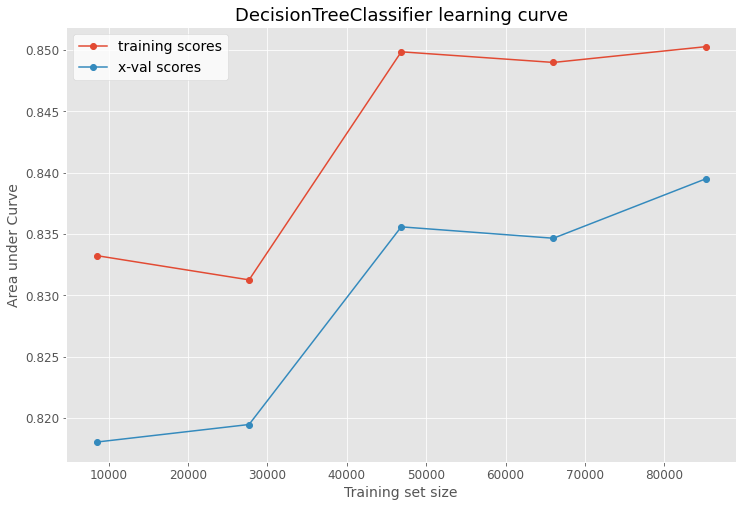

In [84]:
plot_learning_curves(dt_clf, data_train_X, data_train['Threemonthmortality'])

ROC计算

In [117]:
# Import model and retrain
with open('E:/R code-LMX/Yimin-medical disputes/Models/dt_clf_final_round.pkl', 'rb') as f:
    dt_clf = pickle.load(f)
dt_clf.fit(data_train_X, data_train['Y'])

C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


DecisionTreeClassifier(max_depth=7, max_features='log2', min_samples_leaf=9,
                       min_samples_split=176, random_state=42)

In [118]:
accu_dt = accuracy_score(data_test['Y'], dt_clf.predict(data_test_X))
round(accu_dt,3)

0.709

In [119]:
pd.crosstab(data_test['Y'], dt_clf.predict(data_test_X))

col_0,0,1
Y,,
0,15173,2145
1,5504,3463


In [120]:
pred_proba_dt = dt_clf.predict_proba(data_test_X)
fpr, tpr, _ = roc_curve(data_test['Y'], pred_proba_dt[:, 1])
auc_dt = roc_auc_score(data_test['Y'], pred_proba_dt[:, 1])
round(auc_dt,3)

0.7

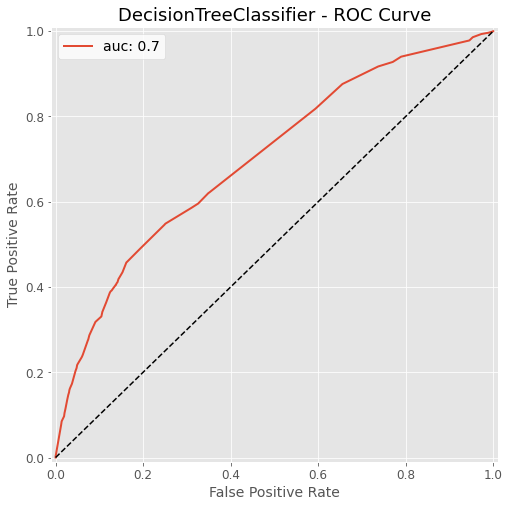

In [121]:
plot_roc_curve(fpr, tpr, round(auc_dt,3), dt_clf)

In [122]:
data_test['lr_pred_proba'] = pred_proba_dt[:, 1]

In [123]:
data_test.to_csv('E:/R code-LMX/Yimin-medical disputes/External validation/test_set_with_predictions-decision tree-external validation.csv'.format(len(data_train)), index=False)

# Random Forests classifier---随机搜索模型调参RandomizedSearchCV
Random forests classifier is an ensemble tree-based model that reduces the variance of the predictors.

plot the learning curve to find out where the default model is at

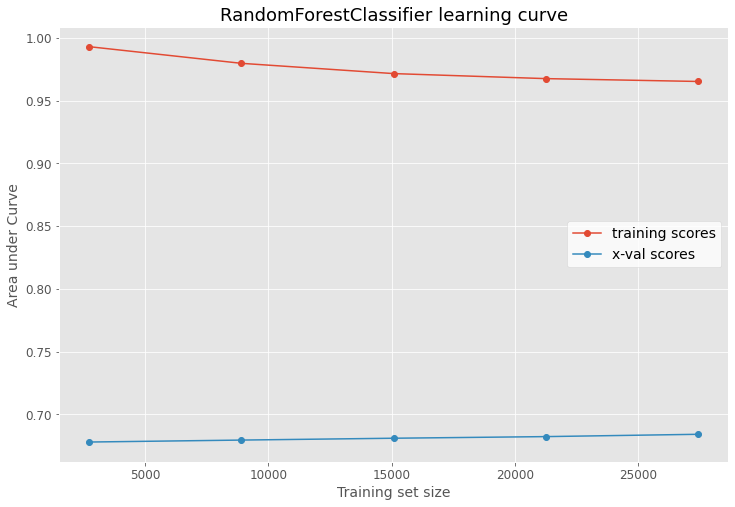

In [191]:
rf_clf = RandomForestClassifier(random_state=42)
plot_learning_curves(rf_clf, data_train_X, data_train['Y'])

In [192]:
param_distribs = {
        'n_estimators': stats.randint(low=1, high=50),
         'max_features': ['auto', 'log2'],
        'max_depth': stats.randint(low=1, high=100),
        'min_samples_split': stats.randint(low=2, high=200), 
        'min_samples_leaf': stats.randint(low=2, high=200)
    }
rf_clf = RandomForestClassifier(random_state=42)
rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_distribs, return_train_score=True,
                                n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
gs=rnd_search.fit(data_train_X, data_train['Y'])

In [193]:
print(gs.best_score_)

0.7368145735052425


In [194]:
print(gs.best_params_)

{'max_depth': 97, 'max_features': 'log2', 'min_samples_leaf': 54, 'min_samples_split': 61, 'n_estimators': 44}


In [195]:
cv_rlt = rnd_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.736815,0.753264,"{'max_depth': 97, 'max_features': 'log2', 'min_samples_leaf': 54, ..."
1,0.736478,0.765517,"{'max_depth': 51, 'max_features': 'auto', 'min_samples_leaf': 22, ..."
2,0.736458,0.752820,"{'max_depth': 96, 'max_features': 'auto', 'min_samples_leaf': 53, ..."
3,0.736231,0.751321,"{'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 55, ..."
4,0.736161,0.757353,"{'max_depth': 99, 'max_features': 'log2', 'min_samples_leaf': 38, ..."
...,...,...,...
95,0.718263,0.732381,"{'max_depth': 90, 'max_features': 'log2', 'min_samples_leaf': 61, ..."
96,0.718099,0.726981,"{'max_depth': 24, 'max_features': 'auto', 'min_samples_leaf': 151,..."
97,0.716235,0.720641,"{'max_depth': 56, 'max_features': 'auto', 'min_samples_leaf': 188,..."
98,0.704423,0.734985,"{'max_depth': 89, 'max_features': 'auto', 'min_samples_leaf': 10, ..."


In [196]:
rf_clf = rnd_search.best_estimator_
rf_clf.fit(data_train_X, data_train['Y'])
with open('E:/R code-LMX/Yimin-medical disputes/Models/rf_clf_final_round.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

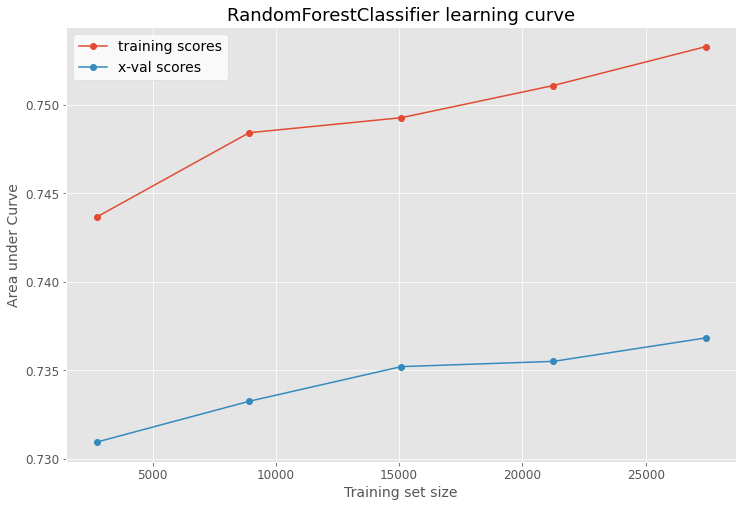

In [197]:
plot_learning_curves(rf_clf, data_train_X, data_train['Y'])

# Random forests model-ROC

In [198]:
# Import model and retrain
with open('E:/R code-LMX/Yimin-medical disputes/Models/rf_clf_final_round.pkl', 'rb') as f:
    rf_clf = pickle.load(f)
rf_clf.fit(data_train_X, data_train['Y'])

RandomForestClassifier(max_depth=97, max_features='log2', min_samples_leaf=54,
                       min_samples_split=61, n_estimators=44, random_state=42)

Accuracy scores

In [199]:
accu_rf = accuracy_score(data_test['Y'], rf_clf.predict(data_test_X))

In [200]:
round(accu_rf,3)

0.716

In [201]:
pd.crosstab(data_test['Y'], rf_clf.predict(data_test_X))

col_0,0,1
Y,,
0,15378,1940
1,5516,3451


ROC and AUC

In [202]:
pred_proba_rf = rf_clf.predict_proba(data_test_X)

In [203]:
fpr, tpr, _ = roc_curve(data_test['Y'], pred_proba_rf[:, 1])
auc_rf = roc_auc_score(data_test['Y'], pred_proba_rf[:, 1])

In [204]:
round(auc_rf,3)

0.729

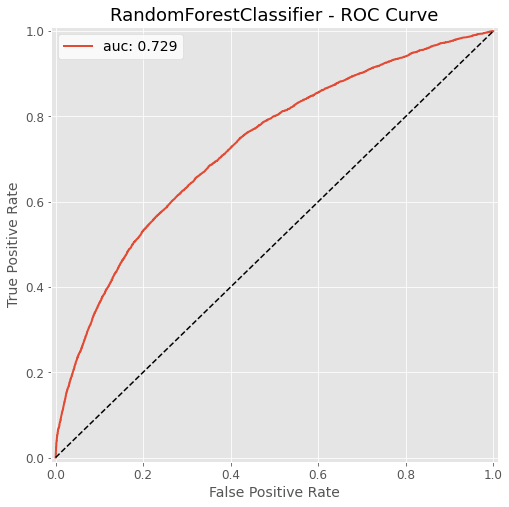

In [205]:
plot_roc_curve(fpr, tpr, round(auc_rf,3), rf_clf)

In [208]:
data_test['lr_pred_proba'] = pred_proba_rf[:, 1]

In [209]:
data_test.to_csv('E:/R code-LMX/Yimin-medical disputes/Models/test_set_with_predictions-Random forests model-external validation.csv'.format(len(data_train)), index=False)

# Neural Network

In [112]:
from sklearn.neural_network import MLPClassifier

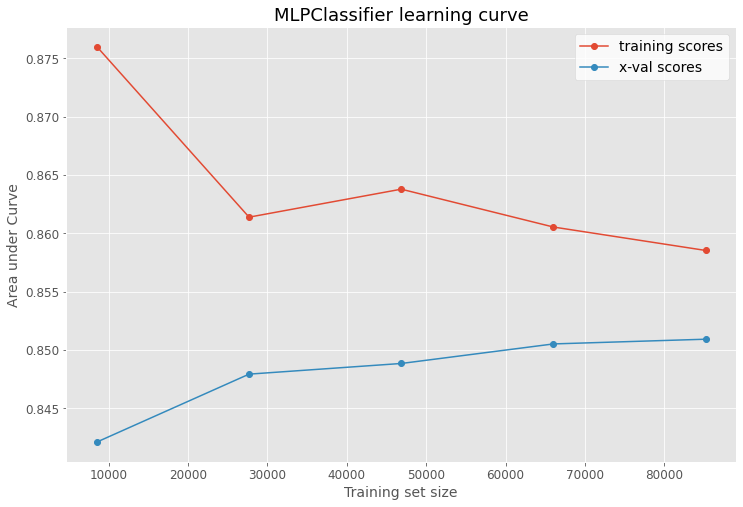

In [113]:
nn_clf = MLPClassifier(random_state=42)
plot_learning_curves(nn_clf, data_train_X, data_train['Threemonthmortality'])

In [114]:
nn_clf = MLPClassifier(random_state=42,activation='relu',alpha=0.0001,batch_size='auto',beta_1=0.9, beta_2=0.999, 
                       early_stopping=False,epsilon=1e-08,hidden_layer_sizes=(100),
                       learning_rate='constant', learning_rate_init=0.001,max_iter=200, momentum=0.9, 
                       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,shuffle=True,  
                       tol=0.0001, validation_fraction=0.1,verbose=False, warm_start=False)

In [115]:
nn_clf.fit(data_train_X, data_train['Threemonthmortality'])
nn_clf_y_pre=nn_clf.predict(data_test_X)
nn_clf_y_proba=nn_clf.predict_proba(data_test_X)

In [116]:
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve

In [117]:
nn_clf_accuracy_score=accuracy_score(data_test['Threemonthmortality'],nn_clf_y_pre)
nn_clf_preci_score=precision_score(data_test['Threemonthmortality'],nn_clf_y_pre)
nn_clf_recall_score=recall_score(data_test['Threemonthmortality'],nn_clf_y_pre)
nn_clf_f1_score=f1_score(data_test['Threemonthmortality'],nn_clf_y_pre)
nn_clf_auc=roc_auc_score(data_test['Threemonthmortality'],nn_clf_y_proba[:,1])
print('nn_clf_accuracy_score: %f,nn_clf_preci_score: %f,nn_clf_recall_score: %f,nn_clf_f1_score: %f,nn_clf_auc: %f'
      %(nn_clf_accuracy_score,nn_clf_preci_score,nn_clf_recall_score,nn_clf_f1_score,nn_clf_auc))

nn_clf_accuracy_score: 0.808607,nn_clf_preci_score: 0.769210,nn_clf_recall_score: 0.676126,nn_clf_f1_score: 0.719670,nn_clf_auc: 0.856121


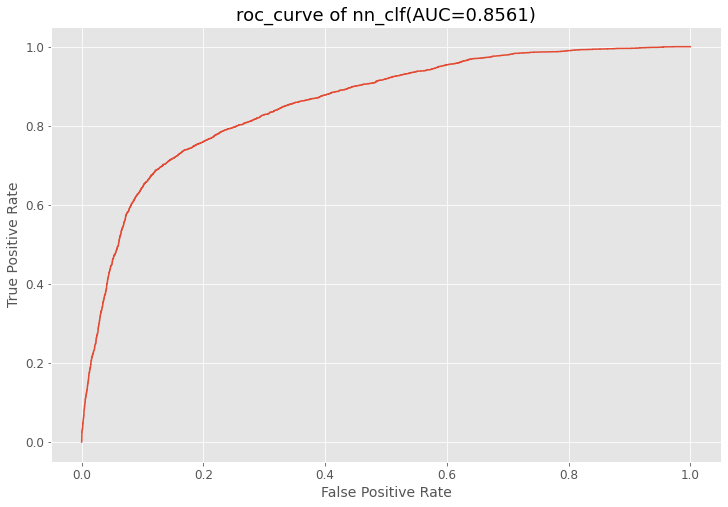

In [118]:
nn_clf_fpr,nn_clf_tpr,nn_clf_threasholds=roc_curve(data_test['Threemonthmortality'],nn_clf_y_proba[:,1]) # 计算ROC的值,svm_threasholds为阈值
plt.title("roc_curve of %s(AUC=%.4f)" %('nn_clf',nn_clf_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(nn_clf_fpr,nn_clf_tpr)
plt.show()

In [122]:
data_test['lr_pred_proba'] = nn_clf_y_proba[:,1]

In [123]:
data_test.to_csv('E:/R code-LMX/R code for SEER-Bone metastasis-LYS/Models/test_set_with_predictions-nn.csv'.format(len(data_train)), index=False)

In [124]:
fpr, tpr, _ = roc_curve(data_test['Threemonthmortality'], nn_clf_y_proba[:,1])
auc_nn = roc_auc_score(data_test['Threemonthmortality'], nn_clf_y_proba[:,1])

In [125]:
round(auc_nn,3)

0.856

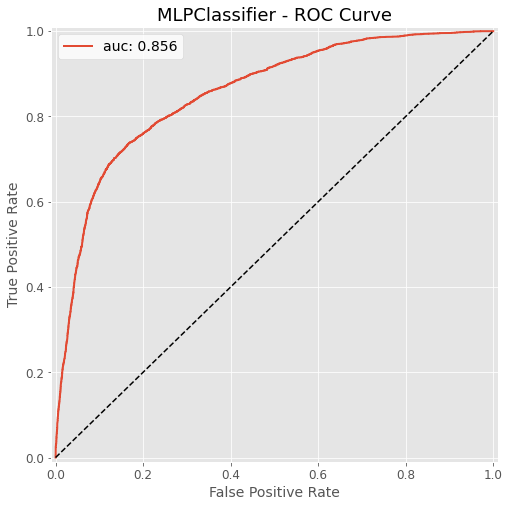

In [126]:
plot_roc_curve(fpr, tpr, round(auc_nn,3), nn_clf)

In [54]:
#continuous_vars = ['age']
categorical_vars = ["x1",
"x2",
"x4",
"x7",
"x8",
"x9",
"x10",
"x17",
"x19",
"x20",
"x234",
"x242",
"x257",
"x26",
"x27",
"x33",
"x22", 
"x36"]
data_train_X = pd.DataFrame(data_train, 
                            columns= categorical_vars)

In [55]:
data_train_X.head

<bound method NDFrame.head of        x1  x2  x4  x7  x8  x9  x10  x17  x19  x20  x234  x242  x257  x26  x27  \
0       1   2   2   3   3   2    2    2    2    2     0     1     1    1    1   
1       1   2   1   1   4   2    2    2    3    3     0     0     1    2    2   
2       1   2   3   3   4   2    2    1    1    1     0     1     1    1    1   
3       1   2   3   4   5   2    1    1    1    1     0     1     1    1    1   
4       1   1   3   1   3   2    2    2    3    2     0     1     1    2    2   
...    ..  ..  ..  ..  ..  ..  ...  ...  ...  ...   ...   ...   ...  ...  ...   
34281   1   1   3   3   4   2    1    1    1    1     0     1     0    1    1   
34282   1   1   3   3   3   2    2    1    1    1     0     1     1    1    1   
34283   1   1   1   1   3   1    2    1    1    1     0     1     1    1    1   
34284   1   6   1   1   2   2    3    1    1    1     0     1     1    1    1   
34285   1   1   1   1   4   2    1    1    1    1     0     1     1    1    1  

# Gradient boosting classifier---随机搜索模型调参RandomizedSearchCV
Gradient boosting classifier is an ensemble tree-based model that reduces the bias of the predictors.

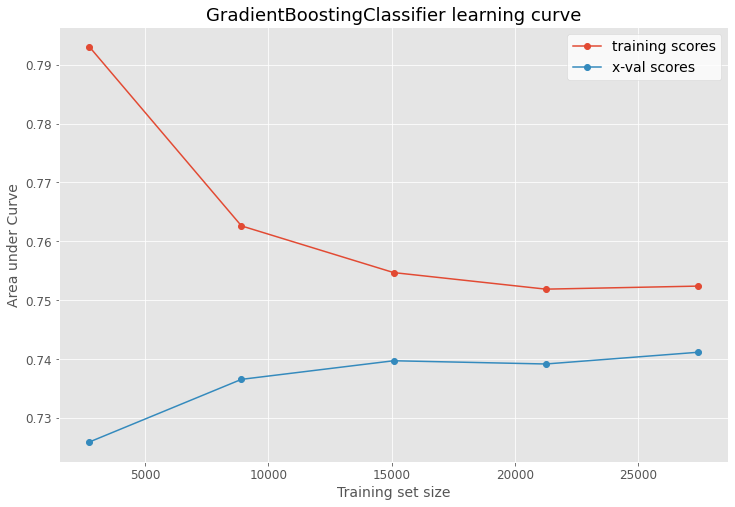

In [28]:
plot_learning_curves(GradientBoostingClassifier(random_state=42), data_train_X, data_train['Y'])

In [56]:
param_distribs = {
        'n_estimators': stats.randint(low=80, high=200),
         'max_features': ['auto', 'log2'],
        'max_depth': stats.randint(low=1, high=100),
        'min_samples_split': stats.randint(low=2, high=200), 
        'min_samples_leaf': stats.randint(low=2, high=200),
    }

rnd_search = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), 
                                param_distributions=param_distribs, return_train_score=True,
                                n_iter=100, cv=5, scoring='roc_auc', random_state=42, n_jobs=-1)
# this will take a long time
gsgbm = rnd_search.fit(data_train_X, data_train['Y'])

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

In [57]:
print(gsgbm.best_score_)

0.741481130383298


In [58]:
print(gsgbm.best_params_)

{'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 49, 'min_samples_split': 141, 'n_estimators': 148}


In [59]:
cv_rlt = rnd_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.741481,0.747415,"{'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 49, 'min_samples_split': 141, 'n_estimators': 148}"
1,0.741458,0.747468,"{'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 173, 'min_samples_split': 161, 'n_estimators': 149}"
2,0.741131,0.753462,"{'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 102, 'min_samples_split': 114, 'n_estimators': 135}"
3,0.740855,0.755372,"{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 152, 'min_samples_split': 144, 'n_estimators': 122}"
4,0.740761,0.756912,"{'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 192, 'min_samples_split': 147, 'n_estimators': 169}"
...,...,...,...
95,0.694925,0.933062,"{'max_depth': 42, 'max_features': 'log2', 'min_samples_leaf': 16, 'min_samples_split': 55, 'n_estimators': 186}"
96,0.694099,0.927781,"{'max_depth': 52, 'max_features': 'auto', 'min_samples_leaf': 16, 'min_samples_split': 108, 'n_estimators': 151}"
97,0.683818,0.954614,"{'max_depth': 41, 'max_features': 'auto', 'min_samples_leaf': 16, 'min_samples_split': 46, 'n_estimators': 144}"
98,0.683147,0.959042,"{'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 9, 'min_samples_split': 54, 'n_estimators': 139}"


In [60]:
gbm_clf = rnd_search.best_estimator_
gbm_clf.fit(data_train_X, data_train['Y'])
with open('E:/R code-LMX/Yimin-medical disputes/gbm_clf_final_round2.pkl', 'wb') as f:
    pickle.dump(gbm_clf, f)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
`max_features

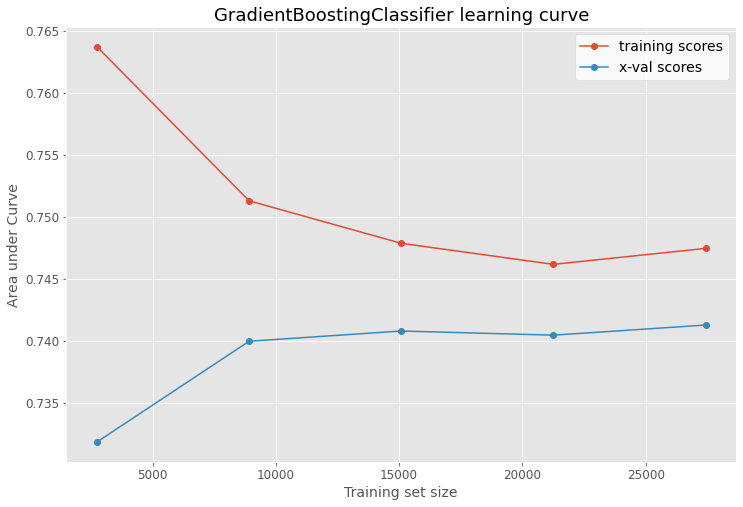

In [35]:
plot_learning_curves(gbm_clf, data_train_X, data_train['Y'])

# Gradient boosting machine model-ROC

In [27]:
# Import model and retrain
with open('E:/R code-LMX/Yimin-medical disputes/Models/gbm_clf_final_round.pkl', 'rb') as f:
    gbm_clf = pickle.load(f)
gbm_clf.fit(data_train_X, data_train['Y'])

C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DummyClassifier from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator GradientBoostingClassifier from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid resul

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

GradientBoostingClassifier(loss='deviance', max_depth=2, max_features='auto',
                           min_samples_leaf=49, min_samples_split=141,
                           n_estimators=148, random_state=42)

Accuracy scores

In [65]:
accu_gbm = accuracy_score(data_test['Y'], gbm_clf.predict(data_test_X))

In [66]:
round(accu_gbm,3)

0.716

In [67]:
pd.crosstab(data_test['Y'], gbm_clf.predict(data_test_X))

col_0,0,1
Y,,
0,15255,2063
1,5393,3574


ROC and AUC

In [68]:
pred_proba_gbm = gbm_clf.predict_proba(data_train_X)
fpr, tpr, _ = roc_curve(data_train['Y'], pred_proba_gbm[:, 1])
auc_gbm = roc_auc_score(data_train['Y'], pred_proba_gbm[:, 1])

In [69]:
pred_proba_gbm = gbm_clf.predict_proba(data_test_X)

In [70]:
fpr, tpr, _ = roc_curve(data_test['Y'], pred_proba_gbm[:, 1])
auc_gbm = roc_auc_score(data_test['Y'], pred_proba_gbm[:, 1])

In [71]:
round(auc_gbm,3)

0.724

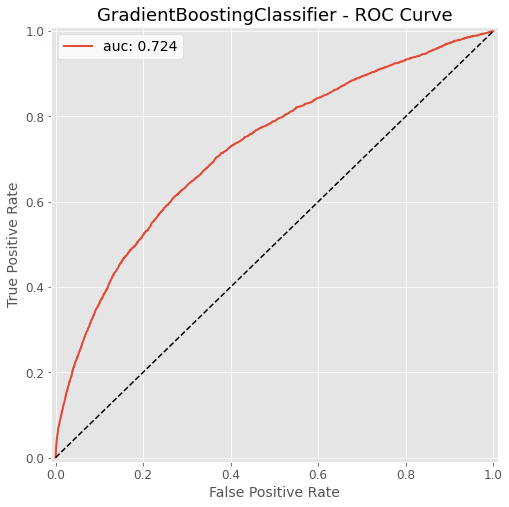

In [73]:
plot_roc_curve(fpr, tpr, round(auc_gbm,3), gbm_clf)

In [74]:
data_test['lr_pred_proba'] = pred_proba_gbm[:, 1]

In [75]:
data_test.to_csv('E:/R code-LMX/Yimin-medical disputes/External validation/test_set_with_predictions-Gradient boosting machine model-external validation.csv'.format(len(data_train)), index=False)

In [30]:
import shap

In [31]:
shap.initjs()

In [28]:
# train an model
model = gbm_clf.fit(data_train_X, data_train['Y'])

C:\Users\63276\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:310: FutureWarning: The loss parameter name 'deviance' was deprecated in v1.1 and will be removed in version 1.3. Use the new parameter name 'log_loss' which is equivalent.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Us

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

In [45]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(data_test_X)###修改此处为不同数据集里面进行运算哦！！！

In [226]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[0])

In [227]:
shap.initjs()
# visualize the first prediction's explanation with a force plot
shap.plots.force(shap_values[10])

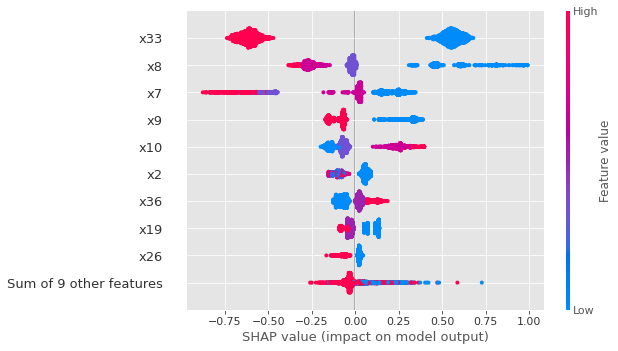

In [46]:
shap.plots.beeswarm(shap_values)###

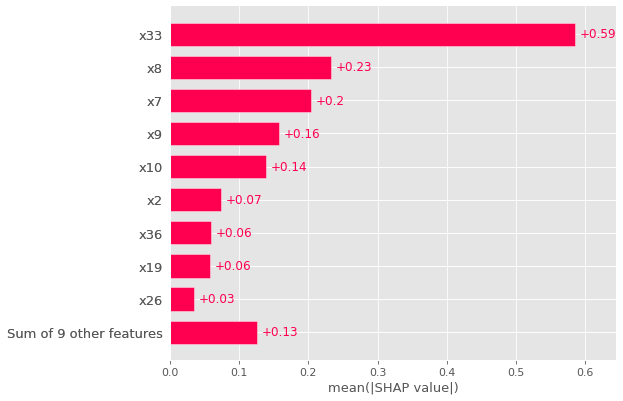

In [49]:
shap.plots.bar(shap_values)

In [50]:
shap_values = explainer(data_test_X[:1000])##数据库前1000个

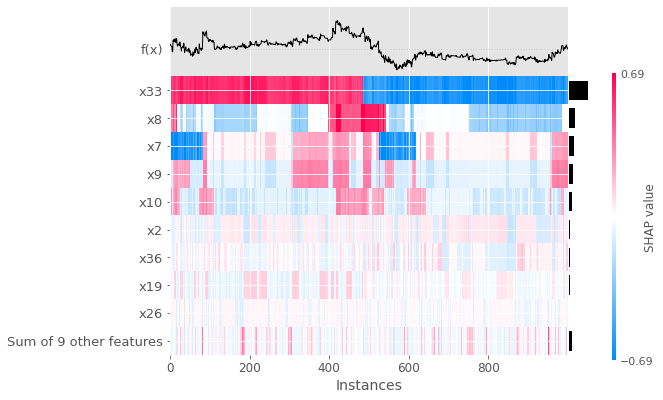

In [51]:
shap.plots.heatmap(shap_values)

# Support vector machine classifier---网格搜索模型调参GridSearchCV
Support vector machine classifier is a powerful classifier that works best on small to medium size complex data set. Our training set is medium size to SVMs.

plot the learning curve to find out where the default model is at

Try Linear SVC fist

In [1]:
plot_learning_curves(LinearSVC(loss='hinge', random_state=42), data_train_X, data_train['anxietyanddepression'])

NameError: name 'plot_learning_curves' is not defined

Try Polynomial kernel

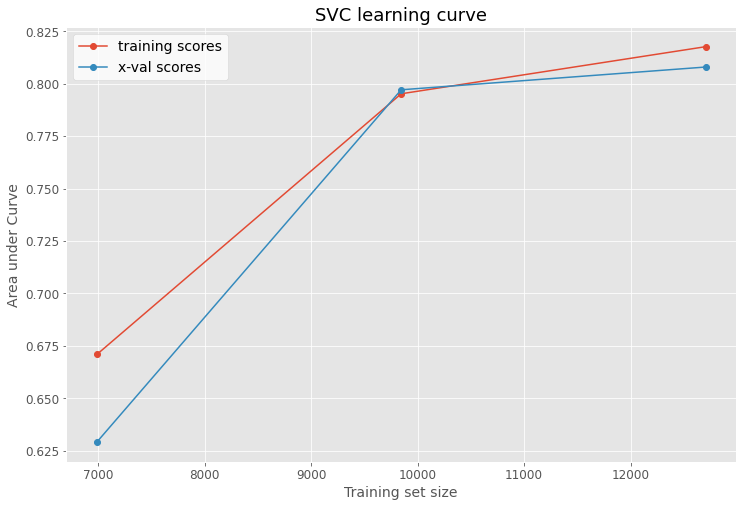

In [38]:
plot_learning_curves(SVC(kernel='poly', random_state=42), data_train_X, data_train['anxietyanddepression'])

Try Gaussian RBF kernel

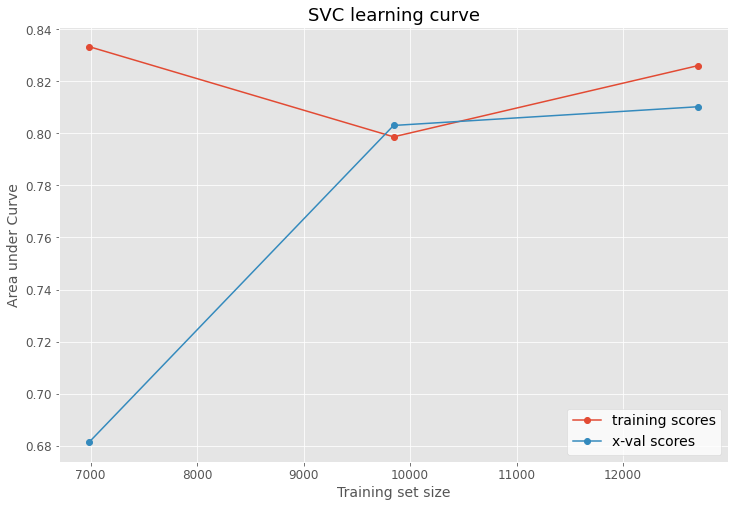

In [22]:
plot_learning_curves(SVC(random_state=42), data_train_X, data_train['anxietyanddepression'])

In [1]:
rbf_gamma = [1/len(data_train_X.columns) * x for x in range(1, 15, 5)]
param_grid = [
    # first try Poly kernel
    ## coef0 hyper-parameter was also tested originally, however, it is taking too long
    {'kernel':['poly'], 'degree': [3, 9, 15], 'C': [1, 3, 9]},
    # then try RBF kernel
    {'gamma': rbf_gamma, 'C': [1, 3, 9]},
  ]

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5,
                           scoring='roc_auc', n_jobs=-1)

# this will take a long time
grid_search.fit(data_train_X, data_train['Threemonthmortality'])

NameError: name 'data_train_X' is not defined

In [ ]:
#cv_rlt = grid_search.cv_results_
#pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
#                   key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

In [ ]:
svc_clf = grid_search.best_estimator_
svc_clf.fit(data_train_X, data_train['anxietyanddepression'])
with open('E:/R code-LMX/R code for SEER for publishing paper/Data/svc_clf_final_round.pkl', 'wb') as f:
    pickle.dump(svc_clf, f)

In [ ]:
# best model is the default RBF kernal SVM
plot_learning_curves(svc_clf, data_train_X, data_train['anxietyanddepression']) 

0. 不调参数(seer-lung cancer使用)

In [ ]:
svm = SVC(kernel='poly',probability=True,random_state=2018,tol=1e-6)  # SVM模型
svm.fit(data_train_X, data_train['Threemonthmortality'])
svm_y_pre=svm.predict(data_test_X)
svm_y_proba=svm.predict_proba(data_test_X)

In [172]:
from sklearn.metrics import f1_score,precision_score,recall_score,roc_auc_score,accuracy_score,roc_curve

In [173]:
svm_accuracy_score=accuracy_score(data_test['anxietyanddepression'],svm_y_pre)
svm_preci_score=precision_score(data_test['anxietyanddepression'],svm_y_pre)
svm_recall_score=recall_score(data_test['anxietyanddepression'],svm_y_pre)
svm_f1_score=f1_score(data_test['anxietyanddepression'],svm_y_pre)
svm_auc=roc_auc_score(data_test['anxietyanddepression'],svm_y_proba[:,1])
print('svm_accuracy_score: %f,svm_preci_score: %f,svm_recall_score: %f,svm_f1_score: %f,svm_auc: %f'
      %(svm_accuracy_score,svm_preci_score,svm_recall_score,svm_f1_score,svm_auc))

svm_accuracy_score: 0.845675,svm_preci_score: 0.725490,svm_recall_score: 0.251701,svm_f1_score: 0.373737,svm_auc: 0.740021


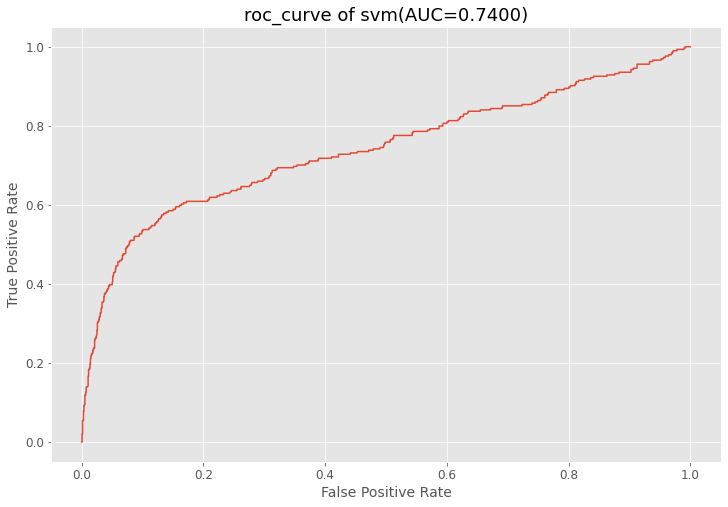

In [174]:
svm_fpr,svm_tpr,svm_threasholds=roc_curve(data_test['anxietyanddepression'],svm_y_proba[:,1]) # 计算ROC的值,svm_threasholds为阈值
plt.title("roc_curve of %s(AUC=%.4f)" %('svm',svm_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.plot(svm_fpr,svm_tpr)
plt.show()

In [31]:
data_test['lr_pred_proba'] = svm_y_proba[:,1]

In [32]:
data_test.to_csv('E:/R code-LMX/R code for SEER for publishing paper/Data/test_set_with_predictions-Support vector machine model2.csv'.format(len(data_train)), index=False)

In [ ]:
svc_clf = grid.best_estimator_
#svc_clf.fit(data_train_X, data_train['anxietyanddepression'])
with open('E:/R code-LMX/R code for SEER for publishing paper/Data/svc_clf_final_round.pkl', 'wb') as f:
    pickle.dump(svc_clf, f)

第一调参

In [ ]:
hyperparameters = {
 'C': [0.1, 1, 100, 1000],
 'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5],
 'kernel': ('linear', 'rbf')
}
grid = GridSearchCV(
 estimator=SVC(probability=True),
 param_grid=hyperparameters,
 cv=5, return_train_score=True,
scoring='f1_micro', 
n_jobs=-1)
gssvm = grid.fit(data_train_X, data_train['anxietyanddepression'])

In [202]:
print(gssvm.best_score_)

NameError: name 'gssvm' is not defined

In [128]:
print(gssvm.best_params_)

{'C': 1, 'gamma': 3, 'kernel': 'rbf'}


In [129]:
cv_rlt = grid.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.921360,0.968478,"{'C': 1, 'gamma': 3, 'kernel': 'rbf'}"
1,0.921360,0.968478,"{'C': 1, 'gamma': 5, 'kernel': 'rbf'}"
2,0.921360,0.968478,"{'C': 100, 'gamma': 3, 'kernel': 'rbf'}"
3,0.921360,0.968478,"{'C': 100, 'gamma': 5, 'kernel': 'rbf'}"
4,0.921360,0.968478,"{'C': 1000, 'gamma': 3, 'kernel': 'rbf'}"
5,0.921360,0.968478,"{'C': 1000, 'gamma': 5, 'kernel': 'rbf'}"
6,0.919210,0.968478,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}"
7,0.919210,0.968478,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}"
8,0.915984,0.968478,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.908416,0.966862,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"


In [130]:
svc_clf = grid.best_estimator_
#svc_clf.fit(data_train_X, data_train['anxietyanddepression'])
with open('E:/R code-LMX/R code for SEER for publishing paper/Data/svc_clf_final_round.pkl', 'wb') as f:
    pickle.dump(svc_clf, f)

In [131]:
svc_clf

SVC(C=1, gamma=3, probability=True)

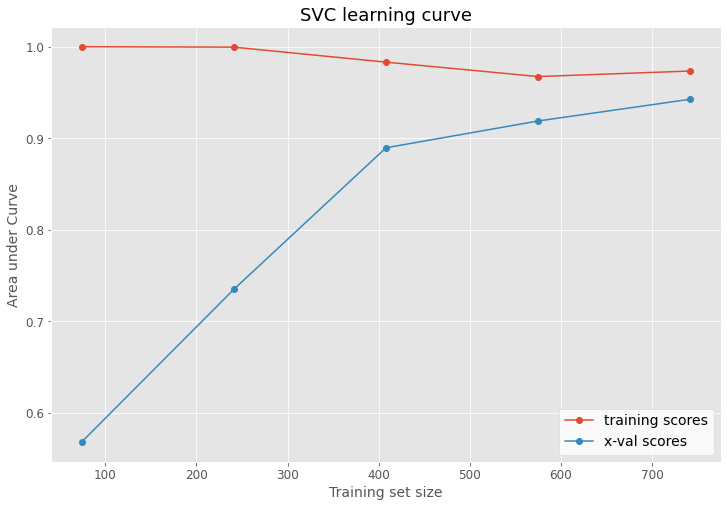

In [132]:
# best model is the default RBF kernal SVM
plot_learning_curves(svc_clf, data_train_X, data_train['anxietyanddepression']) 

第二调参

In [530]:
hyperparameters = {
 "C": stats.uniform(0.001, 0.1),
 "gamma": stats.uniform(0, 0.5),
 'kernel': ('linear', 'rbf')
}
random = RandomizedSearchCV(estimator = SVC(probability=True), param_distributions = hyperparameters, n_iter = 100, 
                            cv = 5, return_train_score=True, random_state=42, n_jobs = -1)
gssvm = random.fit(data_train_X, data_train['anxietyanddepression'])

In [531]:
print(gssvm.best_score_)

0.7833246516008877


In [532]:
print(gssvm.best_params_)

{'C': 0.03845401188473625, 'gamma': 0.4753571532049581, 'kernel': 'linear'}


In [533]:
cv_rlt = random.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

,X-val scores,Train scores,Params
0,0.783325,0.783326,"{'C': 0.03845401188473625, 'gamma': 0.4753571532049581, 'kernel': 'linear'}"
1,0.783325,0.783216,"{'C': 0.016599452033620267, 'gamma': 0.02904180608409973, 'kernel': 'rbf'}"
2,0.783325,0.783326,"{'C': 0.03437086111390219, 'gamma': 0.07143340896097039, 'kernel': 'linear'}"
3,0.783325,0.783326,"{'C': 0.0017066305219717408, 'gamma': 0.011531212520707879, 'kernel': 'linear'}"
4,0.783325,0.783468,"{'C': 0.06218528947223795, 'gamma': 0.06974693032602092, 'kernel': 'rbf'}"
...,...,...,...
95,0.531957,0.537545,"{'C': 0.0024079822715084454, 'gamma': 0.09942120204440258, 'kernel': 'rbf'}"
96,0.517222,0.517222,"{'C': 0.0030584494295802446, 'gamma': 0.48495492608099716, 'kernel': 'rbf'}"
97,0.517222,0.517222,"{'C': 0.002326496115986653, 'gamma': 0.4711008778424264, 'kernel': 'rbf'}"
98,0.517222,0.517222,"{'C': 0.004142918568673425, 'gamma': 0.3182052056318902, 'kernel': 'rbf'}"


In [536]:
svc_clf = random.best_estimator_
#svc_clf.fit(data_train_X, data_train['anxietyanddepression'])
with open('E:/R code-LMX/R code for SEER for publishing paper/Data/svc_clf_final_round.pkl', 'wb') as f:
    pickle.dump(svc_clf, f)

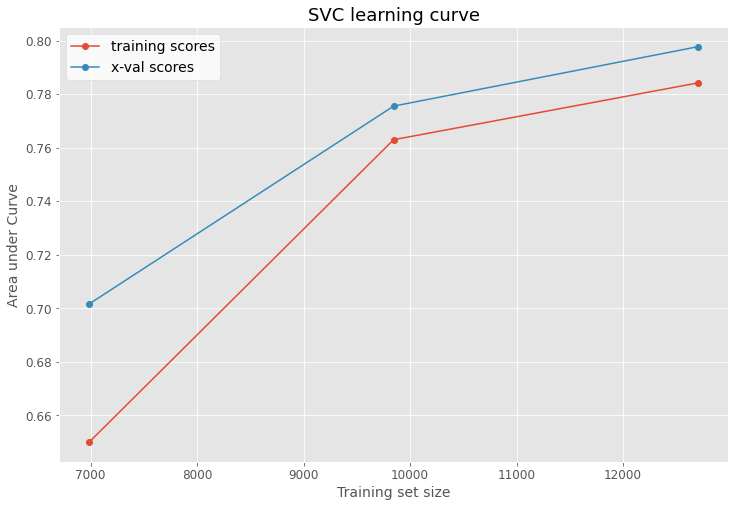

In [535]:
# best model is the default RBF kernal SVM
plot_learning_curves(svc_clf, data_train_X, data_train['anxietyanddepression']) 

第三调参--不用

In [94]:
rbf_gamma = [1/len(data_train_X.columns) * x for x in range(1, 15, 5)]
param_grid = [
    # first try Poly kernel
    ## coef0 hyper-parameter was also tested originally, however, it is taking too long
    {'kernel':['poly'], 'degree': [3, 9, 15], 'C': [1, 3, 9]},
    # then try RBF kernel
    {'gamma': rbf_gamma, 'C': [1, 3, 9]},
  ]

grid_search = GridSearchCV(SVC(probability=True, random_state=42), param_grid, cv=5,
                           scoring='roc_auc', n_jobs=-1)

# this will take a long time
grid_search.fit(data_train_X, data_train['anxietyanddepression'])

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid=[{'C': [1, 3, 9], 'degree': [3, 9, 15],
                          'kernel': ['poly']},
                         {'C': [1, 3, 9], 'gamma': [0.125, 0.75, 1.375]}],
             scoring='roc_auc')

In [95]:
cv_rlt = grid_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"], cv_rlt['mean_train_score'], cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores', 'Train scores', 'Params'])

KeyError: 'mean_train_score'

In [96]:
cv_rlt = grid_search.cv_results_
pd.DataFrame(sorted(list(zip(cv_rlt["mean_test_score"],  cv_rlt["params"])), 
                    key=lambda x: x[0], reverse=True), columns=['X-val scores',  'Params'])

,X-val scores,Params
0,0.961052,"{'C': 1, 'gamma': 0.75}"
1,0.956496,"{'C': 9, 'gamma': 0.75}"
2,0.949324,"{'C': 3, 'gamma': 0.75}"
3,0.938164,"{'C': 3, 'gamma': 1.375}"
4,0.933895,"{'C': 9, 'gamma': 1.375}"
5,0.933816,"{'C': 1, 'gamma': 1.375}"
6,0.923271,"{'C': 9, 'gamma': 0.125}"
7,0.920932,"{'C': 3, 'degree': 15, 'kernel': 'poly'}"
8,0.916793,"{'C': 3, 'gamma': 0.125}"
9,0.911861,"{'C': 1, 'degree': 15, 'kernel': 'poly'}"


In [97]:
svc_clf = grid_search.best_estimator_
svc_clf.fit(data_train_X, data_train['anxietyanddepression'])
with open('E:/svc_clf_final_round.pkl', 'wb') as f:
    pickle.dump(svc_clf, f)

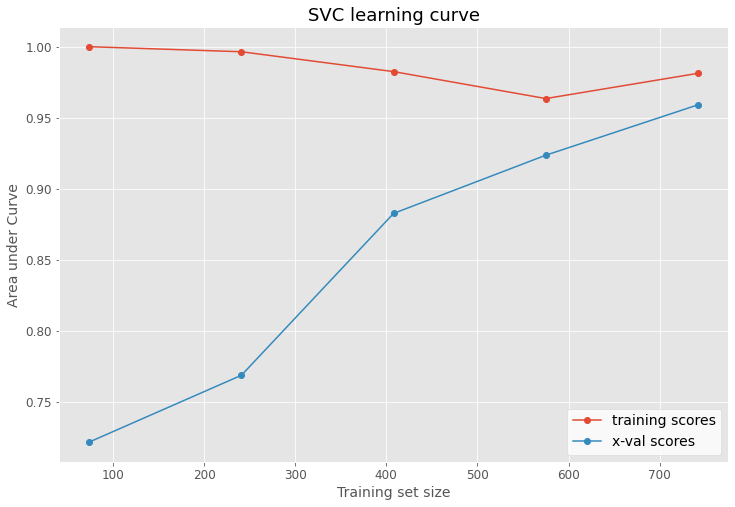

In [98]:
# best model is the default RBF kernal SVM
plot_learning_curves(svc_clf, data_train_X, data_train['anxietyanddepression']) 

# Ensemble classifier
Scikit-learn offers a voting classifier which aggregates the prediction of multiple predictors and is a flexible ensemble technique that allows an ensemble of different models.
For the final classifier, simply aggregate the predictions of the three best models, i.e., random forests, gradien boosting machine and the support vector machine.

In [548]:
ensemble_clf = VotingClassifier(estimators=[('rf', rf_clf), ('gbm', gbm_clf), ('svc', svc_clf),('dt',dt_clf)],
                             voting='soft')
ensemble_clf.fit(data_train_X, data_train['anxietyanddepression'])

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=3,
                                                     max_features='log2',
                                                     min_samples_leaf=67,
                                                     min_samples_split=20,
                                                     n_estimators=16,
                                                     random_state=42)),
                             ('gbm',
                              GradientBoostingClassifier(max_features='auto',
                                                         min_samples_leaf=4,
                                                         min_samples_split=8,
                                                         random_state=42)),
                             ('svc',
                              SVC(C=0.03845401188473625,
                                  gamma=0.4753571532049581, kernel='linear',
                

Check out its learning curve.

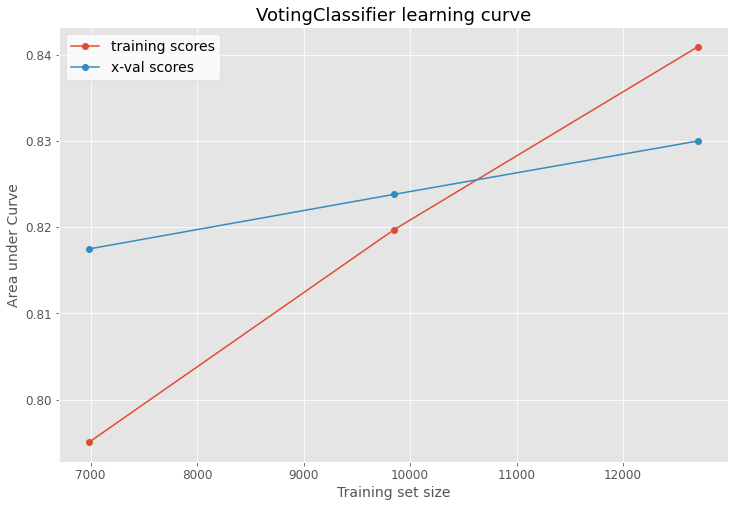

In [549]:
plot_learning_curves(ensemble_clf, data_train_X, data_train['anxietyanddepression'])

In [550]:
with open('E:/R code-LMX/R code for SEER for publishing paper/Data/ensemble_clf_final_round.pkl', 'wb') as f:
    pickle.dump(ensemble_clf, f)

# h2o AutoML

In [155]:
import h2o
from h2o.automl import H2OAutoML

In [156]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [161]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 min 36 secs
H2O_cluster_timezone:,Asia/Shanghai
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,5 months and 19 days !!!
H2O_cluster_name:,H2O_from_python_63276_iwborn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.939 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [162]:
data_train = h2o.import_file(r'E:/R code-LMX/Yimin-medical disputes/Data/start0.9.csv')##只能是csv文件，excle文件还不行哦！！！
#data_test = h2o.import_file(r'E:/R code-LMX/R code for SEER-Bone metastasis-LYS/Data/starv0.1.csv')
data_test = h2o.import_file(r'E:/R code-LMX/Yimin-medical disputes/External validation/4-data.csv')

H2OResponseError: Server error water.exceptions.H2ONotFoundArgumentException:
  Error: File E:\R code-LMX\Yimin-medical disputes\Data\start0.9.csv does not exist
  Request: POST /3/ImportFilesMulti
    data: {'paths': '[E:\\R code-LMX\\Yimin-medical disputes\\Data\\start0.9.csv]'}


In [163]:
##airlines = h2o.import_file('https://s3.amazonaws.com/h2o-public-test-data/smalldata/airlines/allyears2k_headers.zip')

In [164]:
data_train.head()

,Unnamed: 0,No,x1,x2,x4,x7,x8,x9,x10,x11,x12,x13,x14,x17,x18,x19,x20,x21,x22,x231,x233,x234,x241,x242,x243,x257,x26,x27,x28,x31,x33,x36,Y
0,1,2,1,2,2,3,3,2,2,1,2,2,1,2,2,2,2,1,1,0,0,0,1,1,0,1,1,1,1,2,2,2,0
1,2,3,1,2,1,1,4,2,2,1,3,3,3,2,3,3,3,2,2,0,0,0,0,0,0,1,2,2,2,3,1,4,0
2,3,4,1,2,3,3,4,2,2,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,2,0
3,4,5,1,2,3,4,5,2,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0
4,5,6,1,1,3,1,3,2,2,1,2,2,3,2,2,3,2,1,1,1,1,0,1,1,1,1,2,2,2,2,2,3,0


In [17]:
data_train["Marital.status"] = data_train["Marital.status"].asfactor()
data_train["Rural.urban"] = data_train["Rural.urban"].asfactor()
data_train["Brain.m"] = data_train["Brain.m"].asfactor()
data_train["Liver.m"] = data_train["Liver.m"].asfactor()
data_train["Lung.m"] = data_train["Lung.m"].asfactor()
data_train["Primary.site"] = data_train["Primary.site"].asfactor()
data_train["Race"] = data_train["Race"].asfactor()
data_train["Tstage"] = data_train["Tstage"].asfactor()
data_train["Nstage"] = data_train["Nstage"].asfactor()
data_train["Cancer.directed.surgery"] = data_train["Cancer.directed.surgery"].asfactor()
data_train['Radiation'] = data_train['Radiation'].asfactor()
data_train['Chemotherapy'] = data_train['Chemotherapy'].asfactor()
data_train['Sex'] = data_train['Sex'].asfactor()

In [21]:
predictors = ["Rural.urban",
"Marital.status",
"Race",
"Brain.m",
"Liver.m",
"Lung.m",
"Cancer.directed.surgery",
"Radiation",
"Chemotherapy",
"Tstage",
"Nstage",
"Primary.site",
"Sex","Age"]
response = 'Threemonthmortality'

In [22]:
bin_num = [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
label = ["8", "16", "32", "64", "128", "256", "512", "1024", "2048", "4096"]

In [23]:
model = H2OGradientBoostingEstimator(seed=1234)
model.train(x=predictors,y=response,training_frame=data_train,validation_frame=data_test)

gbm Model Build progress: |

C:\Users\63276\anaconda3\lib\site-packages\h2o\estimators\estimator_base.py:208: RuntimeWarning: Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%
Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_model_python_1655210293753_2


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,22860.0,5.0,5.0,5.0,26.0,32.0,31.72




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.14286436279442088
RMSE: 0.377974023967813
MAE: 0.29170667090492025
RMSLE: 0.2649532309814337
Mean Residual Deviance: 0.14286436279442088

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.14187016539071728
RMSE: 0.3766565615925432
MAE: 0.29065911979657366
RMSLE: 0.264618754940582
Mean Residual Deviance: 0.14187016539071728

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2022-06-14 20:41:38,0.003 sec,0.0,0.481879,0.464414,0.232207,0.480978,0.463546,0.231339
1,,2022-06-14 20:41:38,0.088 sec,1.0,0.465089,0.447678,0.216307,0.464026,0.446687,0.215320
2,,2022-06-14 20:41:38,0.146 sec,2.0,0.451016,0.432619,0.203416,0.449751,0.431488,0.202276
3,,2022-06-14 20:41:38,0.189 sec,3.0,0.439259,0.419052,0.192948,0.437836,0.417812,0.191701
4,,2022-06-14 20:41:38,0.233 sec,4.0,0.429461,0.406840,0.184437,0.427880,0.405520,0.183082
5,,2022-06-14 20:41:38,0.283 sec,5.0,0.421284,0.395822,0.177480,0.419551,0.394400,0.176023
6,,2022-06-14 20:41:38,0.330 sec,6.0,0.414483,0.385867,0.171796,0.412576,0.384313,0.170219
7,,2022-06-14 20:41:38,0.369 sec,7.0,0.408865,0.376913,0.167171,0.406854,0.375288,0.165530
8,,2022-06-14 20:41:38,0.405 sec,8.0,0.404174,0.368845,0.163356,0.402016,0.367137,0.161617
9,,2022-06-14 20:41:38,0.444 sec,9.0,0.400319,0.361556,0.160255,0.398055,0.359770,0.158448



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Primary.site,26667.812500,1.000000,0.532556
1,Chemotherapy,15887.108398,0.595741,0.317265
2,Cancer.directed.surgery,1738.354004,0.065185,0.034715
3,Liver.m,1689.341431,0.063348,0.033736
4,Age,875.495056,0.032830,0.017484
5,Radiation,686.048218,0.025726,0.013700
6,Tstage,573.331543,0.021499,0.011449
7,Lung.m,483.759338,0.018140,0.009661
8,Nstage,420.359070,0.015763,0.008395
9,Brain.m,364.061066,0.013652,0.007270


In [26]:
aml = H2OAutoML(max_runtime_secs=60, seed=1)
aml.train(x=predictors,y=response, training_frame=data_train)

AutoML progress: |
20:42:07.136: AutoML: XGBoost is not available; skipping it.
20:42:07.167: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.


20:42:08.260: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

██
20:42:10.677: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classification model, convert the response column to categorical before training.

█
20:42:11.510: _response param, Response is numeric, so the regression model will be trained. However, the cardinality is equaled to two, so if you want to train a classificatio

In [165]:
# Create h2o dataframes. Make sure to run the "Compute and Compare test metrics" cells to create data_test_X 
# before running these cells##data_test在下方绘制ROC曲线前面有。

htrain = h2o.H2OFrame(pd.concat([data_train_X, data_train['Y']], axis=1))
htest = h2o.H2OFrame(pd.concat([data_test_X, data_test['Y']], axis=1))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [166]:
# define cols
x = htrain.columns
y = 'Y'
x.remove(y)

In [167]:
htrain[y] = htrain[y].asfactor()
htest[y] = htest[y].asfactor()

In [34]:
# Train Deep Learners for 5 hous##确实需要5个小时
aml_gbm_deep = H2OAutoML(max_runtime_secs = 18000, exclude_algos=['GLM','GBM','DRF','StackedEnsemble'])
aml_gbm_deep.train(x=x, y=y, training_frame=htrain, leaderboard_frame=htest)

AutoML progress: |
12:26:15.115: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_2_20220504_122615_model_210


Status of Neuron Layers: predicting anxietyanddepression, 2-class classification, bernoulli distribution, CrossEntropy loss, 222 weights/biases, 6.3 KB, 9,289,280 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,8,Input,20.0,,,,,,,,,
1,,2,20,RectifierDropout,10.0,0.0,0.0,0.00323,0.010163,0.0,0.086401,0.875263,-2.097864,1.429163
2,,3,2,Softmax,,0.0,0.0,0.08771,0.206028,0.0,-0.736752,8.430927,-14.894226,0.577911




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.03626699933733746
RMSE: 0.1904389648610217
LogLoss: 0.11852131036743513
Mean Per-Class Error: 0.04863900671367173
AUC: 0.9885846512542488
AUCPR: 0.9661527972111967
Gini: 0.9771693025084975

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23679862571633672: 


,,0,1,Error,Rate
0,0,708.0,26.0,0.0354,(26.0/734.0)
1,1,12.0,182.0,0.0619,(12.0/194.0)
2,Total,720.0,208.0,0.0409,(38.0/928.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.367986e-01,0.905473,20.0
1,max f2,7.390813e-02,0.925000,21.0
2,max f0point5,6.595001e-01,0.931759,15.0
3,max accuracy,2.367986e-01,0.959052,20.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,1.791230e-02,1.000000,29.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,2.367986e-01,0.880248,20.0
8,max min_per_class_accuracy,7.390813e-02,0.946866,21.0
9,max mean_per_class_accuracy,2.367986e-01,0.951361,20.0



Gains/Lift Table: Avg response rate: 20.91 %, avg score: 17.67 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.014009,1.000000e+00,4.783505,4.783505,1.000000,1.000000e+00,1.000000,1.000000,0.067010,0.067010,378.350515,378.350515,0.067010
1,2,0.023707,1.000000e+00,4.783505,4.783505,1.000000,1.000000e+00,1.000000,1.000000,0.046392,0.113402,378.350515,378.350515,0.113402
2,3,0.039871,1.000000e+00,4.783505,4.783505,1.000000,1.000000e+00,1.000000,1.000000,0.077320,0.190722,378.350515,378.350515,0.190722
3,4,0.043103,9.999979e-01,4.783505,4.783505,1.000000,9.999979e-01,1.000000,1.000000,0.015464,0.206186,378.350515,378.350515,0.206186
4,5,0.052802,9.999709e-01,4.783505,4.783505,1.000000,9.999709e-01,1.000000,0.999995,0.046392,0.252577,378.350515,378.350515,0.252577
5,6,0.104526,9.957791e-01,4.783505,4.783505,1.000000,9.982123e-01,1.000000,0.999113,0.247423,0.500000,378.350515,378.350515,0.500000
6,7,0.153017,6.595001e-01,4.783505,4.783505,1.000000,8.585557e-01,1.000000,0.954570,0.231959,0.731959,378.350515,378.350515,0.731959
7,8,0.213362,3.127676e-01,2.904271,4.252005,0.607143,3.884375e-01,0.888889,0.794452,0.175258,0.907216,190.427099,325.200458,0.877244
8,9,0.320043,2.300894e-02,0.434864,2.979624,0.090909,6.251977e-02,0.622896,0.550474,0.046392,0.953608,-56.513590,197.962442,0.801020
9,10,0.401940,2.749230e-04,0.566468,2.487936,0.118421,5.845301e-03,0.520107,0.439504,0.046392,1.000000,-43.353228,148.793566,0.756131




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.03363513952679131
RMSE: 0.1833988536681495
LogLoss: 0.10846879151443826
Mean Per-Class Error: 0.06380797213404871
AUC: 0.9903052052023934
AUCPR: 0.9677309947508493
Gini: 0.9806104104047868

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4008855165894701: 


,,0,1,Error,Rate
0,0,716.0,18.0,0.0245,(18.0/734.0)
1,1,20.0,174.0,0.1031,(20.0/194.0)
2,Total,736.0,192.0,0.0409,(38.0/928.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,4.008855e-01,0.901554,79.0
1,max f2,1.250840e-01,0.939664,94.0
2,max f0point5,5.609593e-01,0.915663,71.0
3,max accuracy,4.008855e-01,0.959052,79.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,4.781098e-03,1.000000,143.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,4.008855e-01,0.875724,79.0
8,max min_per_class_accuracy,1.810614e-01,0.948229,89.0
9,max mean_per_class_accuracy,1.250840e-01,0.959037,94.0



Gains/Lift Table: Avg response rate: 20.91 %, avg score: 18.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.012931,1.000000e+00,4.783505,4.783505,1.000000,1.000000e+00,1.000000,1.000000,0.061856,0.061856,378.350515,378.350515,0.061856
1,2,0.021552,9.999997e-01,4.783505,4.783505,1.000000,9.999998e-01,1.000000,1.000000,0.041237,0.103093,378.350515,378.350515,0.103093
2,3,0.031250,9.999902e-01,4.783505,4.783505,1.000000,9.999936e-01,1.000000,0.999998,0.046392,0.149485,378.350515,378.350515,0.149485
3,4,0.042026,9.999558e-01,4.783505,4.783505,1.000000,9.999695e-01,1.000000,0.999991,0.051546,0.201031,378.350515,378.350515,0.201031
4,5,0.050647,9.995930e-01,4.783505,4.783505,1.000000,9.997515e-01,1.000000,0.999950,0.041237,0.242268,378.350515,378.350515,0.242268
5,6,0.100216,9.709244e-01,4.783505,4.783505,1.000000,9.888939e-01,1.000000,0.994481,0.237113,0.479381,378.350515,378.350515,0.479381
6,7,0.150862,6.404694e-01,4.579952,4.715169,0.957447,8.476603e-01,0.985714,0.945191,0.231959,0.711340,357.995174,371.516937,0.708615
7,8,0.206897,4.008855e-01,3.311657,4.335052,0.692308,5.139004e-01,0.906250,0.828383,0.185567,0.896907,231.165741,333.505155,0.872384
8,9,0.300647,4.457064e-02,0.934708,3.274729,0.195402,1.608568e-01,0.684588,0.620230,0.087629,0.984536,-6.529210,227.472934,0.864645
9,10,0.399784,3.300818e-03,0.155984,2.501348,0.032609,2.006355e-02,0.522911,0.471402,0.015464,1.000000,-84.401614,150.134771,0.758856




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.965504,0.018916,0.946237,0.973118,0.989247,0.945946,0.972973
1,auc,0.990529,0.007502,0.989756,0.992926,0.999411,0.978769,0.991782
2,err,0.034496,0.018916,0.053763,0.026882,0.010753,0.054054,0.027027
3,err_count,6.400000,3.507136,10.000000,5.000000,2.000000,10.000000,5.000000
4,f0point5,0.898885,0.050840,0.879828,0.913706,0.962441,0.824742,0.913706
5,f1,0.920498,0.043224,0.891304,0.935065,0.976190,0.864865,0.935065
6,f2,0.943481,0.036743,0.903084,0.957447,0.990338,0.909091,0.957447
7,lift_top_group,4.827624,0.503156,4.133333,5.027027,4.536585,5.441176,5.000000
8,logloss,0.108532,0.041418,0.119615,0.078004,0.069500,0.173644,0.101895
9,max_per_class_error,0.043112,0.030494,0.088889,0.027027,0.013793,0.058824,0.027027



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-05-04 16:49:43,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-05-04 16:49:43,4:23:28.366,488421 obs/sec,10.0,1,9280.0,0.308202,0.326727,0.425529,0.910521,0.717240,4.783505,0.116379
2,,2022-05-04 16:49:48,4:23:33.371,1058667 obs/sec,5720.0,572,5308160.0,0.166150,0.088929,0.833046,0.992180,0.973096,4.783505,0.032328
3,,2022-05-04 16:49:51,4:23:36.222,1184403 obs/sec,10010.0,1001,9289280.0,0.190439,0.118521,0.780664,0.988585,0.966153,4.783505,0.040948



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,x16,1.000000,1.000000,0.266589
1,x5,0.650050,0.650050,0.173296
2,x1,0.436250,0.436250,0.116300
3,x2,0.405690,0.405690,0.108153
4,x9,0.383571,0.383571,0.102256
5,x15,0.325664,0.325664,0.086818
6,x6,0.295866,0.295866,0.078875
7,x7,0.253998,0.253998,0.067713


In [35]:
aml_gbm_deep.leaderboard

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid_1_AutoML_2_20220504_122615_model_210,0.911569,0.650429,0.829819,0.141176,0.335595,0.112624
DeepLearning_grid_1_AutoML_2_20220504_122615_model_230,0.910784,1.30338,0.796974,0.142157,0.338173,0.114361
DeepLearning_grid_1_AutoML_2_20220504_122615_model_233,0.908824,0.688482,0.833737,0.157843,0.334221,0.111704
DeepLearning_grid_1_AutoML_2_20220504_122615_model_229,0.908039,0.85277,0.820322,0.144118,0.359286,0.129087
DeepLearning_grid_1_AutoML_2_20220504_122615_model_70,0.905686,0.63963,0.835672,0.17451,0.333746,0.111386
DeepLearning_grid_1_AutoML_2_20220504_122615_model_98,0.902157,0.904759,0.810404,0.181373,0.377911,0.142817
DeepLearning_grid_1_AutoML_2_20220504_122615_model_2,0.901765,0.628171,0.809244,0.158824,0.355345,0.12627
DeepLearning_grid_1_AutoML_2_20220504_122615_model_221,0.901765,0.870136,0.830955,0.163725,0.326345,0.106501
DeepLearning_grid_1_AutoML_2_20220504_122615_model_86,0.900588,0.698055,0.817229,0.17549,0.343384,0.117913
DeepLearning_grid_1_AutoML_2_20220504_122615_model_134,0.900588,0.99421,0.774945,0.17451,0.339348,0.115157


In [36]:
# Save best deep learner predictions
h2o_deep_pred = aml_gbm_deep.leader.predict(htest)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [37]:
# Save the model
model_path = h2o.save_model(model=aml_gbm_deep.leader, path='E:/R code-LMX/R code for SEER for publishing paper/Data/h2o_deep_learner_may31', force=True)

In [38]:
model_path

'E:\\h2o_deep_learner_may31\\DeepLearning_grid_1_AutoML_2_20220504_122615_model_210'

# Compute and compare test metrics

Transform test data set

In [81]:
data_test_X = pd.DataFrame(preproc_pipeline.transform(data_test), # it's imperative not to do fit_transfomr again
                           columns=categorical_vars + continuous_vars)

In [82]:
data_test_X.shape

(4006, 12)

In [83]:
data_test_X.head()

,primarysite,Histology,race,Sex,tstage,nstage,brainm,liverm,surgery,Radiation,Chemotherapy,age
0,2.0,2.0,4.0,2.0,6.0,5.0,3.0,3.0,1.0,1.0,1.0,0.863930
1,6.0,1.0,4.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.406375
2,6.0,1.0,1.0,1.0,6.0,5.0,1.0,1.0,1.0,1.0,1.0,-1.305851
3,2.0,1.0,2.0,1.0,6.0,5.0,3.0,3.0,1.0,1.0,1.0,-0.582591
4,4.0,1.0,2.0,2.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.225560


Compute test accuracy score

In [84]:
def plot_roc_curve(fpr, tpr, auc, model=None):
    if model == None:
        title = None
    elif isinstance(model, str):
        title = model
    else:
        title = model.__class__.__name__
#    title = None if model == None else model.__class__.__name__
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, linewidth=2, label='auc: {}'.format(auc))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-.01, 1.01, -.01, 1.01])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(fontsize=14).get_frame().set_facecolor('white')
    plt.title('{} - ROC Curve'.format(title))

# Logistic Regression model

In [35]:
# Import model and retrain
with open('E:/R code-LMX/R code for SEER for publishing paper/Data/lr_clf_final_round.pkl', 'rb') as f:
    lr_clf = pickle.load(f)
lr_clf.fit(data_train_X, data_train['anxietyanddepression'])

LogisticRegression(C=0.1, random_state=42)

Accuracy scores

In [36]:
accu_lr = accuracy_score(data_test['anxietyanddepression'], lr_clf.predict(data_test_X))

In [37]:
round(accu_lr,3)

0.771

In [38]:
pd.crosstab(data_test['anxietyanddepression'], lr_clf.predict(data_test_X))

col_0,0,1
anxietyanddepression,,
0,1634,384
1,532,1456


ROC and AUC

In [39]:
pred_proba_lr = lr_clf.predict_proba(data_test_X)

In [40]:
fpr, tpr, _ = roc_curve(data_test['anxietyanddepression'], pred_proba_lr[:, 1])
auc_lr = roc_auc_score(data_test['anxietyanddepression'], pred_proba_lr[:, 1])

In [41]:
round(auc_lr,3)

0.815

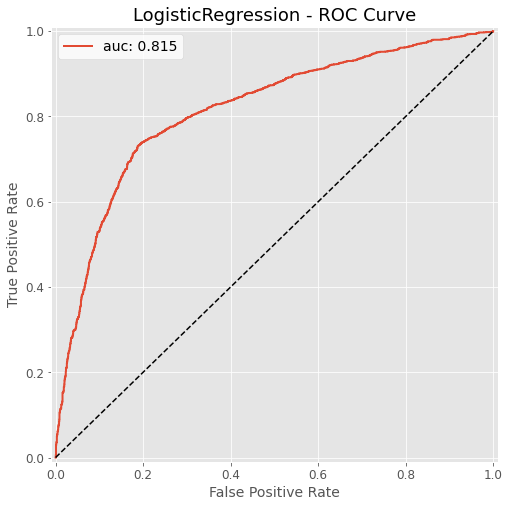

In [42]:
plot_roc_curve(fpr, tpr, round(auc_lr,3), lr_clf)

Concat prediction_proba for each model to test set, save test set

In [43]:
data_test['lr_pred_proba'] = pred_proba_lr[:, 1]

In [44]:
data_test.to_csv('E:/R code-LMX/R code for SEER for publishing paper/Data/test_set_with_predictions-lr.csv'.format(len(data_train)), index=False)

# XGBc

In [45]:
# Import model and retrain
with open('E:/R code-LMX/R code for SEER for publishing paper/Data/Xgbc_clf_final_round.pkl', 'rb') as f:
    Xgbc_clf = pickle.load(f)
Xgbc_clf.fit(data_train_X, data_train['anxietyanddepression'])

[09:07:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=45, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [46]:
accu_Xgbc = accuracy_score(data_test['anxietyanddepression'], Xgbc_clf.predict(data_test_X))

In [47]:
round(accu_Xgbc,3)

0.771

In [48]:
pd.crosstab(data_test['anxietyanddepression'], Xgbc_clf.predict(data_test_X))

col_0,0,1
anxietyanddepression,,
0,1633,385
1,531,1457


In [75]:
#pred_proba_Xgbc = Xgbc_clf.predict_proba(data_train_X)

In [76]:
#fpr, tpr, _ = roc_curve(data_train['anxietyanddepression'], pred_proba_Xgbc[:, 1])
#auc_Xgbc = roc_auc_score(data_train['anxietyanddepression'], pred_proba_Xgbc[:, 1])

In [49]:
pred_proba_Xgbc = Xgbc_clf.predict_proba(data_test_X)

In [50]:
fpr, tpr, _ = roc_curve(data_test['anxietyanddepression'], pred_proba_Xgbc[:, 1])
auc_Xgbc = roc_auc_score(data_test['anxietyanddepression'], pred_proba_Xgbc[:, 1])

In [51]:
round(auc_Xgbc,3)

0.819

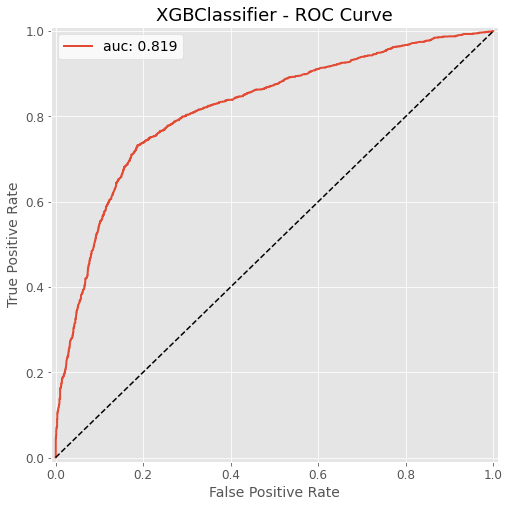

In [52]:
plot_roc_curve(fpr, tpr, round(auc_Xgbc,3), Xgbc_clf)

In [92]:
data_test['lr_pred_proba'] = pred_proba_Xgbc[:, 1]

In [93]:
data_test.to_csv('E:/R code-LMX/R code for SEER for publishing paper/Data/test_set_with_predictions-Xgbc.csv'.format(len(data_train)), index=False)

# Random forests model

In [190]:
# Import model and retrain
with open('E:/R code-LMX/Yimin-medical disputes/Models/Models/rf_clf_final_round.pkl', 'rb') as f:
    rf_clf = pickle.load(f)
rf_clf.fit(data_train_X, data_train['Y'])

C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


ValueError: Invalid parameter 'min_impurity_split' for estimator DecisionTreeClassifier(max_depth=97, max_features='log2', min_samples_leaf=54,
                       min_samples_split=61). Valid parameters are: ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'].

Accuracy scores

In [138]:
accu_rf = accuracy_score(data_test['anxietyanddepression'], rf_clf.predict(data_test_X))

In [139]:
round(accu_rf,3)

0.849

In [140]:
pd.crosstab(data_test['anxietyanddepression'], rf_clf.predict(data_test_X))

col_0,0,1
anxietyanddepression,,
0,1279,34
1,208,86


ROC and AUC

In [141]:
pred_proba_rf = rf_clf.predict_proba(data_test_X)

In [142]:
fpr, tpr, _ = roc_curve(data_test['anxietyanddepression'], pred_proba_rf[:, 1])
auc_rf = roc_auc_score(data_test['anxietyanddepression'], pred_proba_rf[:, 1])

In [143]:
round(auc_rf,3)

0.828

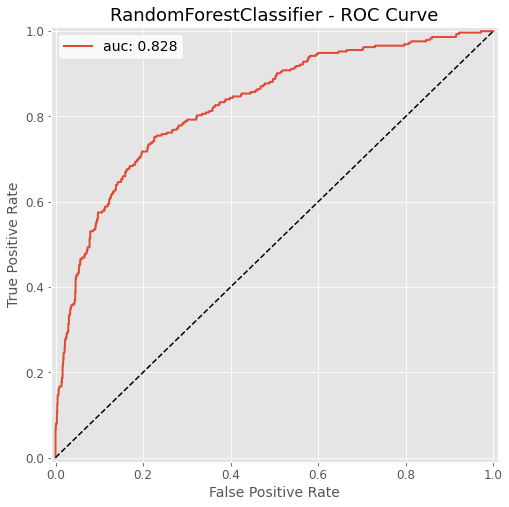

In [144]:
plot_roc_curve(fpr, tpr, round(auc_rf,3), rf_clf)

In [578]:
data_test['lr_pred_proba'] = pred_proba_rf[:, 1]

In [579]:
data_test.to_csv('E:/R code-LMX/R code for SEER for publishing paper/Data/test_set_with_predictions-Random forests model.csv'.format(len(data_train)), index=False)

# Gradient boosting machine model

In [371]:
# Import model and retrain
with open('E:/R code-LMX/R code for SEER for publishing paper/Data/gbm_clf_final_round.pkl', 'rb') as f:
    gbm_clf = pickle.load(f)
gbm_clf.fit(data_train_X, data_train['anxietyanddepression'])

GradientBoostingClassifier(max_features='auto', min_samples_leaf=4,
                           min_samples_split=8, random_state=42)

Accuracy scores

In [372]:
accu_gbm = accuracy_score(data_test['anxietyanddepression'], gbm_clf.predict(data_test_X))

In [373]:
round(accu_gbm,3)

0.772

In [374]:
pd.crosstab(data_test['anxietyanddepression'], gbm_clf.predict(data_test_X))

col_0,0,1
anxietyanddepression,,
0,1637,381
1,534,1454


ROC and AUC

In [375]:
pred_proba_gbm = gbm_clf.predict_proba(data_test_X)

In [376]:
fpr, tpr, _ = roc_curve(data_test['anxietyanddepression'], pred_proba_gbm[:, 1])
auc_gbm = roc_auc_score(data_test['anxietyanddepression'], pred_proba_gbm[:, 1])

In [131]:
pred_proba_gbm = gbm_clf.predict_proba(data_train_X)

In [132]:
fpr, tpr, _ = roc_curve(data_train['anxietyanddepression'], pred_proba_gbm[:, 1])
auc_gbm = roc_auc_score(data_train['anxietyanddepression'], pred_proba_gbm[:, 1])

In [377]:
round(auc_gbm,3)

0.82

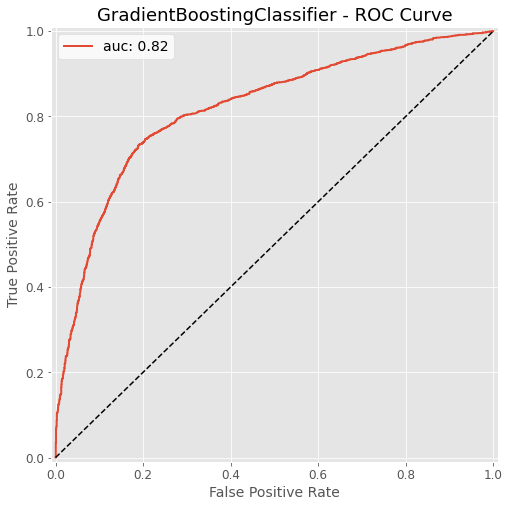

In [378]:
plot_roc_curve(fpr, tpr, round(auc_gbm,3), gbm_clf)

In [379]:
data_test['lr_pred_proba'] = pred_proba_gbm[:, 1]

In [380]:
data_test.to_csv('E:/R code-LMX/R code for SEER for publishing paper/Data/test_set_with_predictions-Gradient boosting machine model.csv'.format(len(data_train)), index=False)

# Support vector machine model

In [125]:
# Import model and retrain
with open('E:/R code-LMX/Yimin-medical disputes/Models/svc_clf_final_round.pkl', 'rb') as f:
    svc_clf = pickle.load(f)
svc_clf.fit(data_train_X, data_train['Y'])

C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator SVC from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


SVC(C=0.016599452033620267, gamma=0.02904180608409973, probability=True)

In [126]:
accu_svc = accuracy_score(data_test['Y'], svc_clf.predict(data_test_X))

In [127]:
round(accu_svc,3)

0.711

In [129]:
pd.crosstab(data_test['Y'], svc_clf.predict(data_test_X))

col_0,0,1
Y,,
0,15919,1399
1,6199,2768


In [130]:
pred_proba_svc = svc_clf.predict_proba(data_test_X) 

In [131]:
svc_clf.predict

<bound method BaseSVC.predict of SVC(C=0.016599452033620267, gamma=0.02904180608409973, probability=True)>

In [132]:
fpr, tpr, _ = roc_curve(data_test['Y'], pred_proba_svc[:, 1])
auc_svc = roc_auc_score(data_test['Y'], pred_proba_svc[:, 1])

In [135]:
round(auc_svc,3)

0.728

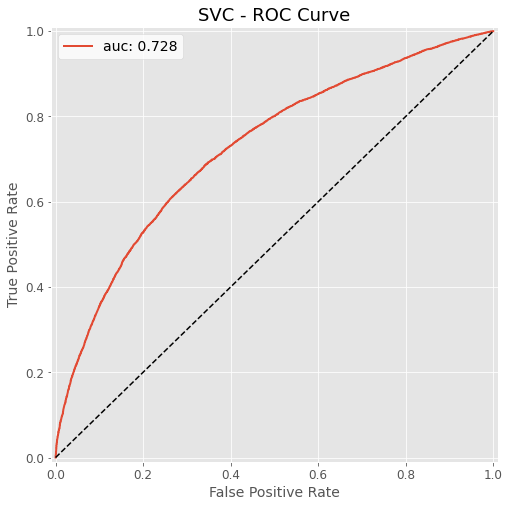

In [136]:
plot_roc_curve(fpr, tpr, round(auc_svc,3), svc_clf)

In [138]:
data_test['lr_pred_proba'] = pred_proba_svc[:, 1]

In [139]:
data_test.to_csv('E:/R code-LMX/Yimin-medical disputes/External validation/test_set_with_predictions-Support vector machine model-external validaiton.csv'.format(len(data_train)), index=False)

# The ensemble model

In [141]:
# Import model and retrain
with open('E:/R code-LMX/Yimin-medical disputes/Models/ensemble_clf_final_round.pkl', 'rb') as f:
    ensemble_clf = pickle.load(f)
ensemble_clf.fit(data_train_X, data_train['Y'])

C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.24.2 when using version 1.1.2. This might lead to breaking code or invalid re

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\63276\a

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=97,
                                                     max_features='log2',
                                                     min_samples_leaf=54,
                                                     min_samples_split=61,
                                                     n_estimators=44,
                                                     random_state=42)),
                             ('gbm',
                              GradientBoostingClassifier(loss='deviance',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         min_samples_leaf=49,
                                                         min_samples_split=141,
                                                         n_estimators=148,
                                                         random_state=42)),
                             ('svc',
                              SVC(C=0.016599452033620267,
                                  gamma=0.02904180608409973,
                                  probability=True)),
                             ('dt',
                              DecisionTreeClassifier(max_depth=7,
                                                     max_features='log2',
                                                     min_samples_leaf=9,
                                                     min_samples_split=176,
                                                     random_state=42))],
                 voting='soft')

In [142]:
accu_ensemble = accuracy_score(data_test['Y'], ensemble_clf.predict(data_test_X))

In [143]:
round(accu_ensemble,3)

0.717

In [144]:
pd.crosstab(data_test['Y'], ensemble_clf.predict(data_test_X))

col_0,0,1
Y,,
0,15575,1743
1,5697,3270


ROC and AUC

In [145]:
ensemble_clf.predict(data_test_X)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [146]:
ensemble_clf.predict_proba(data_test_X)

array([[0.52296124, 0.47703876],
       [0.38848107, 0.61151893],
       [0.73625948, 0.26374052],
       ...,
       [0.8168273 , 0.1831727 ],
       [0.68143417, 0.31856583],
       [0.83623265, 0.16376735]])

In [147]:
pred_proba_ensemble = ensemble_clf.predict_proba(data_test_X)

In [148]:
fpr, tpr, _ = roc_curve(data_test['Y'], pred_proba_ensemble[:, 1])
auc_ensemble = roc_auc_score(data_test['Y'], pred_proba_ensemble[:, 1])

In [150]:
round(auc_ensemble,3)

0.733

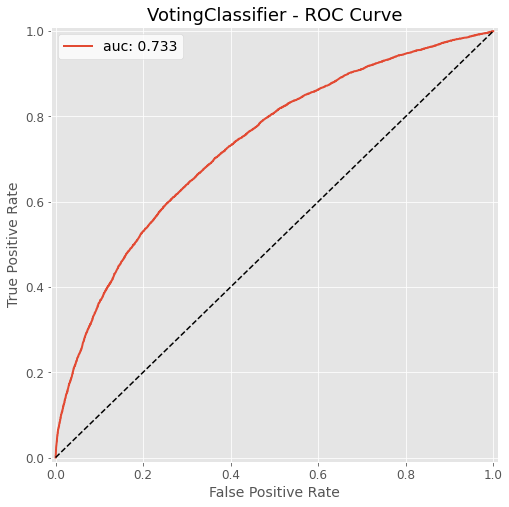

In [151]:
plot_roc_curve(fpr, tpr, round(auc_ensemble,3), ensemble_clf)

In [152]:
data_test['lr_pred_proba'] = pred_proba_ensemble[:, 1]

In [153]:
data_test.to_csv('E:/R code-LMX/Yimin-medical disputes/External validation/test_set_with_predictions-The ensemble model-external validtion.csv'.format(len(data_train)), index=False)

# H2O Deep Learner

In [154]:
model_path

NameError: name 'model_path' is not defined

In [171]:
# Use manual path if model_path is not defined
h2o_deep_learner = h2o.load_model('E:\\R code-LMX\\Yimin-medical disputes\\Models\\h2o_deep_learner_may31\\DeepLearning_grid_3_AutoML_1_20220720_10323_model_3')

In [172]:
h2o_deep_learner.train(x=x, y=y, training_frame=htrain)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1664718741983_1


Status of Neuron Layers: predicting Y, 2-class classification, bernoulli distribution, CrossEntropy loss, 44,402 weights/biases, 530.1 KB, 342,860 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,18,Input,0.0,,,,,,,,,
1,,2,200,Rectifier,0.0,0.0,0.0,0.012851,0.006378,0.0,-0.005777,0.166243,0.187832,0.122662
2,,3,200,Rectifier,0.0,0.0,0.0,0.103258,0.142189,0.0,-0.035831,0.077953,0.874203,0.071968
3,,4,2,Softmax,,0.0,0.0,0.004411,0.001689,0.0,-0.013921,0.343042,0.002243,0.069618




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.19970617102219743
RMSE: 0.44688496396969707
LogLoss: 0.5845964672136442
Mean Per-Class Error: 0.31077414288499317
AUC: 0.7586599154126006
AUCPR: 0.7336148175789131
Gini: 0.5173198308252012

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38721691356118454: 


,,0,1,Error,Rate
0,0,3084.0,2197.0,0.416,(2197.0/5281.0)
1,1,974.0,3765.0,0.2055,(974.0/4739.0)
2,Total,4058.0,5962.0,0.3165,(3171.0/10020.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.387217,0.703673,245.0
1,max f2,0.142984,0.821990,369.0
2,max f0point5,0.519570,0.684175,180.0
3,max accuracy,0.472791,0.697505,205.0
4,max precision,0.962804,1.000000,0.0
5,max recall,0.081999,1.000000,394.0
6,max specificity,0.962804,1.000000,0.0
7,max absolute_mcc,0.464630,0.394457,209.0
8,max min_per_class_accuracy,0.466515,0.692551,208.0
9,max mean_per_class_accuracy,0.464630,0.697495,209.0



Gains/Lift Table: Avg response rate: 47.30 %, avg score: 45.68 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010080,0.934131,2.051567,2.051567,0.970297,0.944770,0.970297,0.944770,0.020679,0.020679,105.156705,105.156705,0.020111
1,2,0.020060,0.916210,1.860646,1.956581,0.880000,0.922675,0.925373,0.933778,0.018569,0.039249,86.064571,95.658131,0.036408
2,3,0.030140,0.898500,1.884092,1.932338,0.891089,0.907627,0.913907,0.925032,0.018991,0.058240,88.409219,93.233826,0.053317
3,4,0.040020,0.884188,1.836726,1.908733,0.868687,0.890343,0.902743,0.916468,0.018147,0.076387,83.672556,90.873313,0.069002
4,5,0.050200,0.867615,1.803433,1.887380,0.852941,0.877434,0.892644,0.908552,0.018358,0.094746,80.343334,88.738009,0.084520
5,6,0.100000,0.785107,1.686411,1.787297,0.797595,0.828279,0.845309,0.868576,0.083984,0.178730,68.641144,78.729690,0.149379
6,7,0.150100,0.721524,1.646850,1.740419,0.778884,0.754709,0.823138,0.830570,0.082507,0.261237,64.685003,74.041902,0.210867
7,8,0.201098,0.665118,1.444061,1.665263,0.682975,0.692417,0.787593,0.795535,0.073644,0.334881,44.406100,66.526322,0.253836
8,9,0.300000,0.579127,1.414558,1.582612,0.669021,0.614489,0.748503,0.735849,0.139903,0.474784,41.455842,58.261237,0.331629
9,10,0.400000,0.516325,1.230217,1.494514,0.581836,0.546617,0.706836,0.688541,0.123022,0.597805,23.021735,49.451361,0.375310




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2022-10-02 22:01:18,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-10-02 22:01:20,2.624 sec,17237 obs/sec,1.0,1,34286.0,0.458437,0.608949,0.156876,0.728389,0.702373,2.009698,0.351996
2,,2022-10-02 22:01:25,7.409 sec,41489 obs/sec,8.0,8,274288.0,0.448428,0.587995,0.193289,0.757226,0.730715,2.011731,0.316667
3,,2022-10-02 22:01:27,8.856 sec,43230 obs/sec,10.0,10,342860.0,0.446885,0.584596,0.198831,0.758660,0.733615,2.051567,0.316467



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,x7,1.000000,1.000000,0.093694
1,x33,0.923640,0.923640,0.086540
2,x8,0.777340,0.777340,0.072832
3,x9,0.638720,0.638720,0.059844
4,x2,0.579603,0.579603,0.054305
5,x17,0.574171,0.574171,0.053797
6,x36,0.570709,0.570709,0.053472
7,x19,0.569559,0.569559,0.053364
8,x22,0.566853,0.566853,0.053111
9,x26,0.542675,0.542675,0.050846


In [173]:
# Get predictions
h2o_deep_pred = h2o_deep_learner.predict(htest)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [174]:
# Convert to pandas df
h2o_deep_pred = h2o_deep_pred['p1'].as_data_frame()

In [175]:
h2o_deep_pred

,p1
0,0.576964
1,0.759607
2,0.269933
3,0.856537
4,0.583723
...,...
26280,0.381428
26281,0.146815
26282,0.118839
26283,0.168538


In [176]:
accu_h2o_deep = accuracy_score(data_test['Y'], round(h2o_deep_pred))
accu_h2o_deep

0.7082746813772114

In [178]:
##下面没有计算出来，有问题
pd.crosstab(data_test['Y'], round(h2o_deep_pred))

ValueError: Data must be 1-dimensional

In [181]:
fpr, tpr, _ = roc_curve(data_test['Y'], h2o_deep_pred)
auc_h2o_deep = roc_auc_score(data_test['Y'], h2o_deep_pred)

In [185]:
round(auc_h2o_deep,3)

0.7

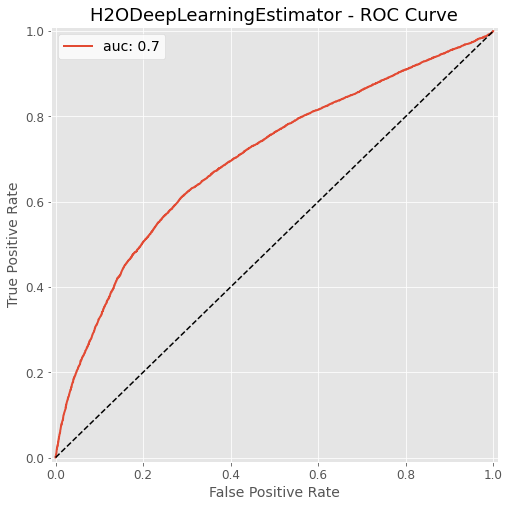

In [186]:
plot_roc_curve(fpr, tpr, round(auc_h2o_deep,3), h2o_deep_learner)

In [187]:
data_test['lr_pred_proba'] = h2o_deep_pred

In [188]:
data_test.to_csv('E:/R code-LMX/Yimin-medical disputes/External validation/test_set_with_predictions-h2o_deep_pred-external validation.csv'.format(len(data_train)), index=False)

Class breakdown per model
下面的代码中
[df.g == 0]，df.后面为y变量，此处为anxietyanddepression

In [88]:
def plot_class_breakdown_hist(df, var, var_name, plot_title, xlog=False, ylog=False, **histkwargs):
    df[var][df.anxietyanddepression == 0].hist(alpha=.5, label='Negative', color = "green", **histkwargs)
    df[var][df.anxietyanddepression == 1].hist(alpha=.5, label='Positive', color = "red", **histkwargs)
    plt.xlabel(var_name)
    plt.title(plot_title)
    if xlog:
        plt.xscale('log')
    if ylog:
        plt.yscale('log')
    plt.ylim(ymax=35, ymin=0)
    plt.legend()
    plt.savefig(var_name + ' Class Breakdown.png');

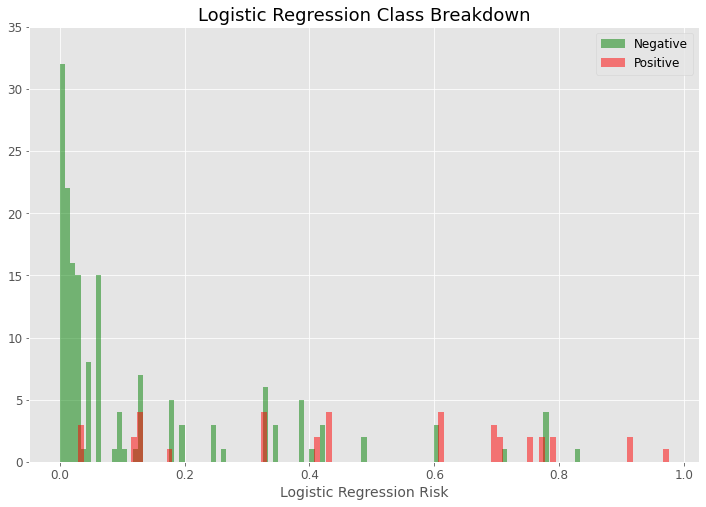

In [89]:
plot_class_breakdown_hist(data_test, 'lr_pred_proba', var_name='Logistic Regression Risk', 
                          plot_title='Logistic Regression Class Breakdown', bins=100)